# <i>911 Call Ananlysis<i>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("/Users/Ananya1/Downloads/911.csv")

In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
data.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [8]:
data['zip']=data['zip'].fillna(data.groupby('twp')['zip'].transform('max'))

In [9]:
data.isnull().sum()

lat            0
lng            0
desc           0
zip          169
title          0
timeStamp      0
twp          293
addr           0
e              0
dtype: int64

In [10]:
data.shape

(663522, 9)

In [11]:
data = data.dropna()

In [12]:
data.shape

(663229, 9)

In [13]:
data.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Questions

###### Q1. What are the top 5 zipcodes from which 911 calls are recieved ?

In [15]:
data['zip'].value_counts().head()

19464.0    53933
19401.0    45596
19403.0    35035
19446.0    33652
19468.0    22664
Name: zip, dtype: int64

###### Q2. What are the top 5 townships (twp) from which most 911 calls recived ?

In [16]:
data['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

##### Q3. How many unique title codes are there ?

In [17]:
data.nunique()

lat           25892
lng           25923
desc         662989
zip             200
title           148
timeStamp    640736
twp              68
addr          41249
e                 1
dtype: int64

## Creating new features

In [18]:
reson=[]
def reasons(x):
    reson.append(x.split(':')[0])
data['title'].apply(reasons)
data['reason'] = reson

In [19]:
Sub_reason=[]
def sub_reasons(x):
    sub_reason = x.split(':')[1]
    Sub_reason.append(sub_reason.replace(' -',''))
data['title'].apply(sub_reasons)
data['sub_reasons'] = Sub_reason

##### Q4. What is the most common Reason for a 911 call based off of this new column ?

In [20]:
data['reason'].value_counts()

EMS        332480
Traffic    230204
Fire       100545
Name: reason, dtype: int64

##### Create a countplot of 911 calls by Reason

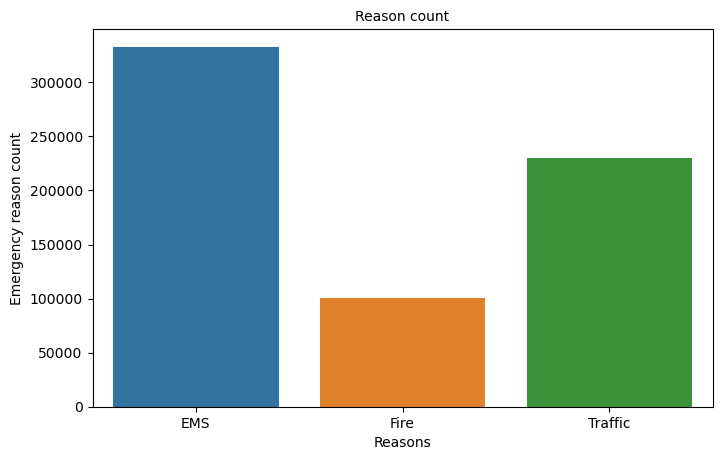

In [21]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x ='reason',data= data)
plt.title('Reason count',fontsize=10)
plt.ylabel('Emergency reason count',fontsize=10)
plt.xlabel('Reasons',fontsize=10);

In [22]:
type(data['timeStamp'].iloc[0])

str

We will create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column. We will map the actual string names to the day of the week:

In [23]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [25]:
days=[]
hours =[]
months =[]
dayofweek =[]
def hdmcol(x):
    days.append(x.day)
    hours.append(x.hour)
    months.append(x.month)
    dayofweek.append(x.dayofweek)
pd.to_datetime(data['timeStamp'])
data['timeStamp'].apply(hdmcol)
data['day'] = days
data['hour'] = hours
data['month'] = months
data['dayofweek'] = dayofweek
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['day_of_week'] = data['dayofweek'].map(dmap)
data.drop('dayofweek', inplace = True,axis =1)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub_reasons,day,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,10,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,10,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,10,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,10,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,10,16,12,Thu


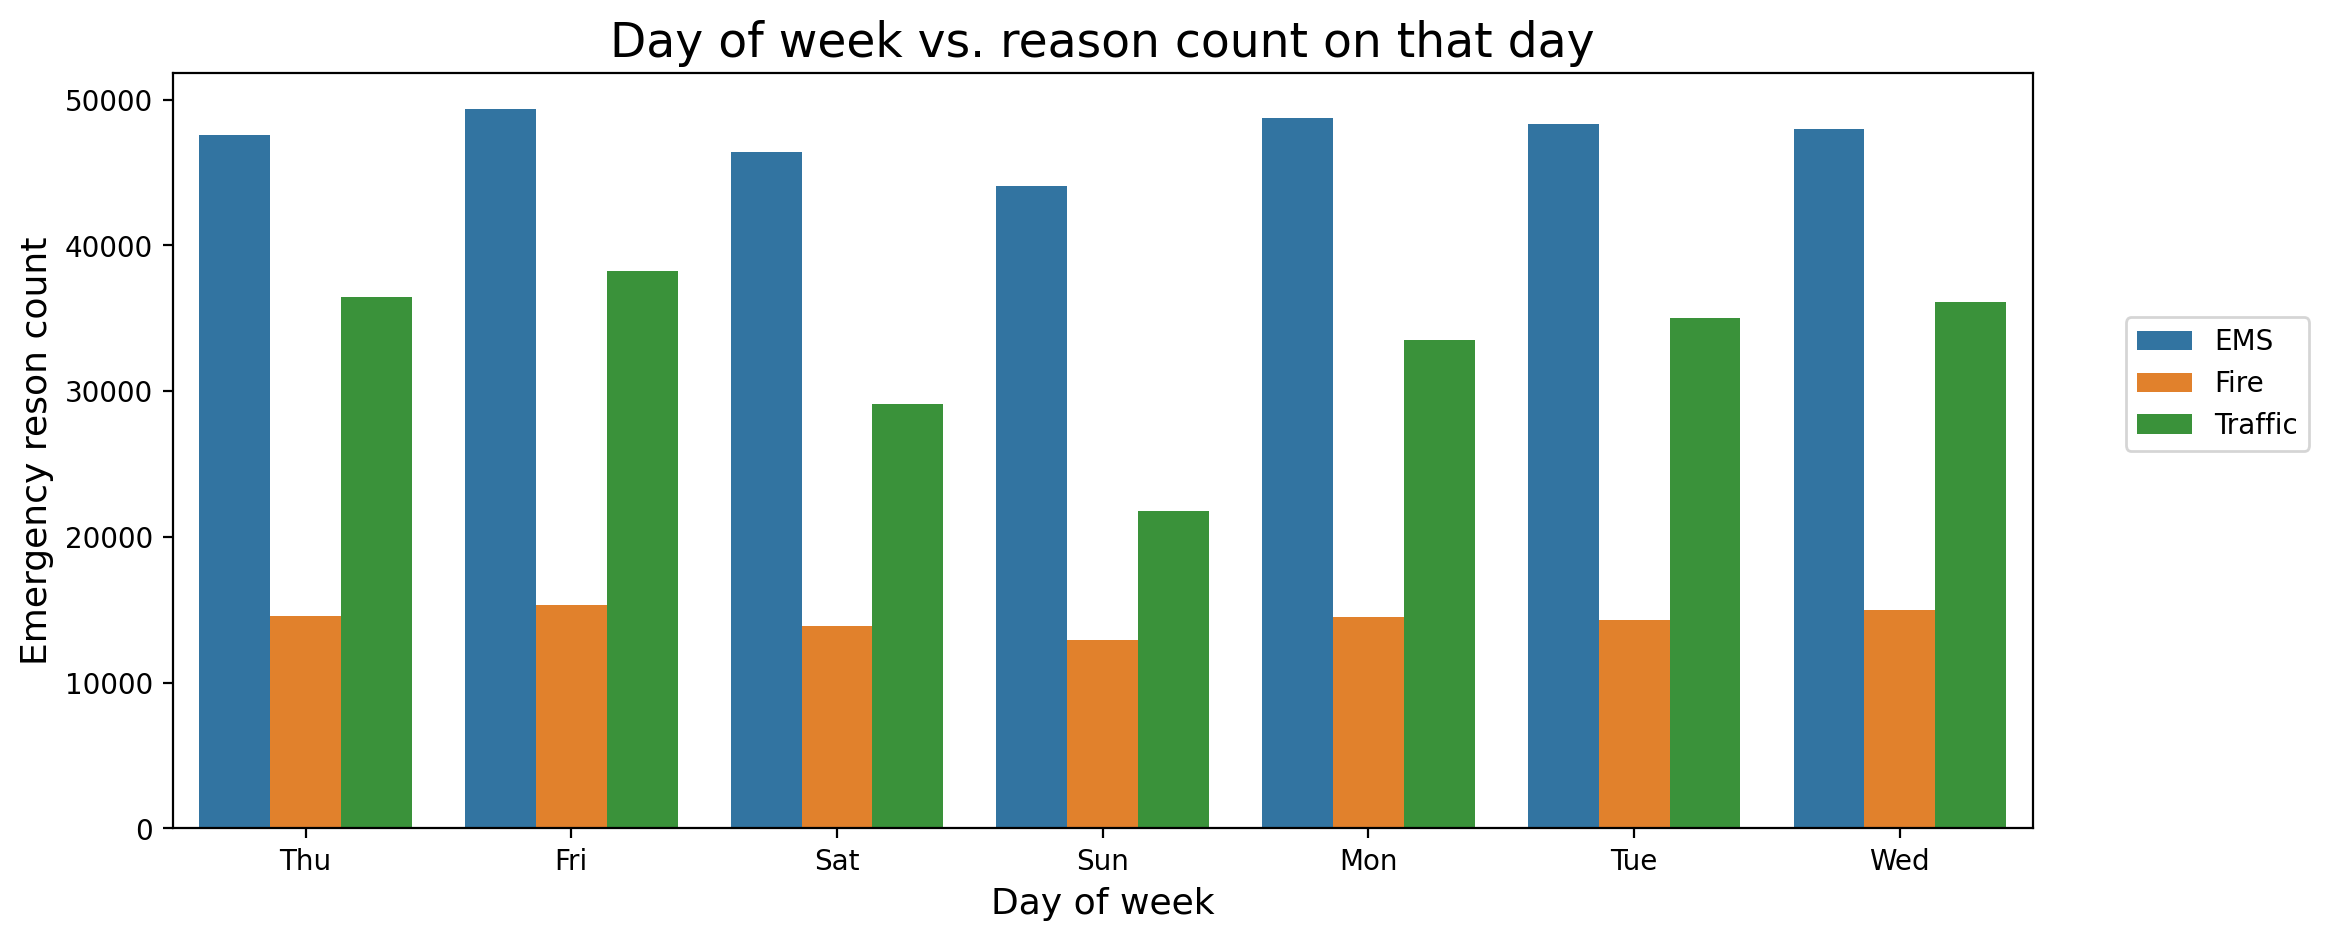

In [26]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='day_of_week',data = data, hue = 'reason')
plt.title('Day of week vs. reason count on that day',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Day of week',fontsize=13);

Now do the same for Month:

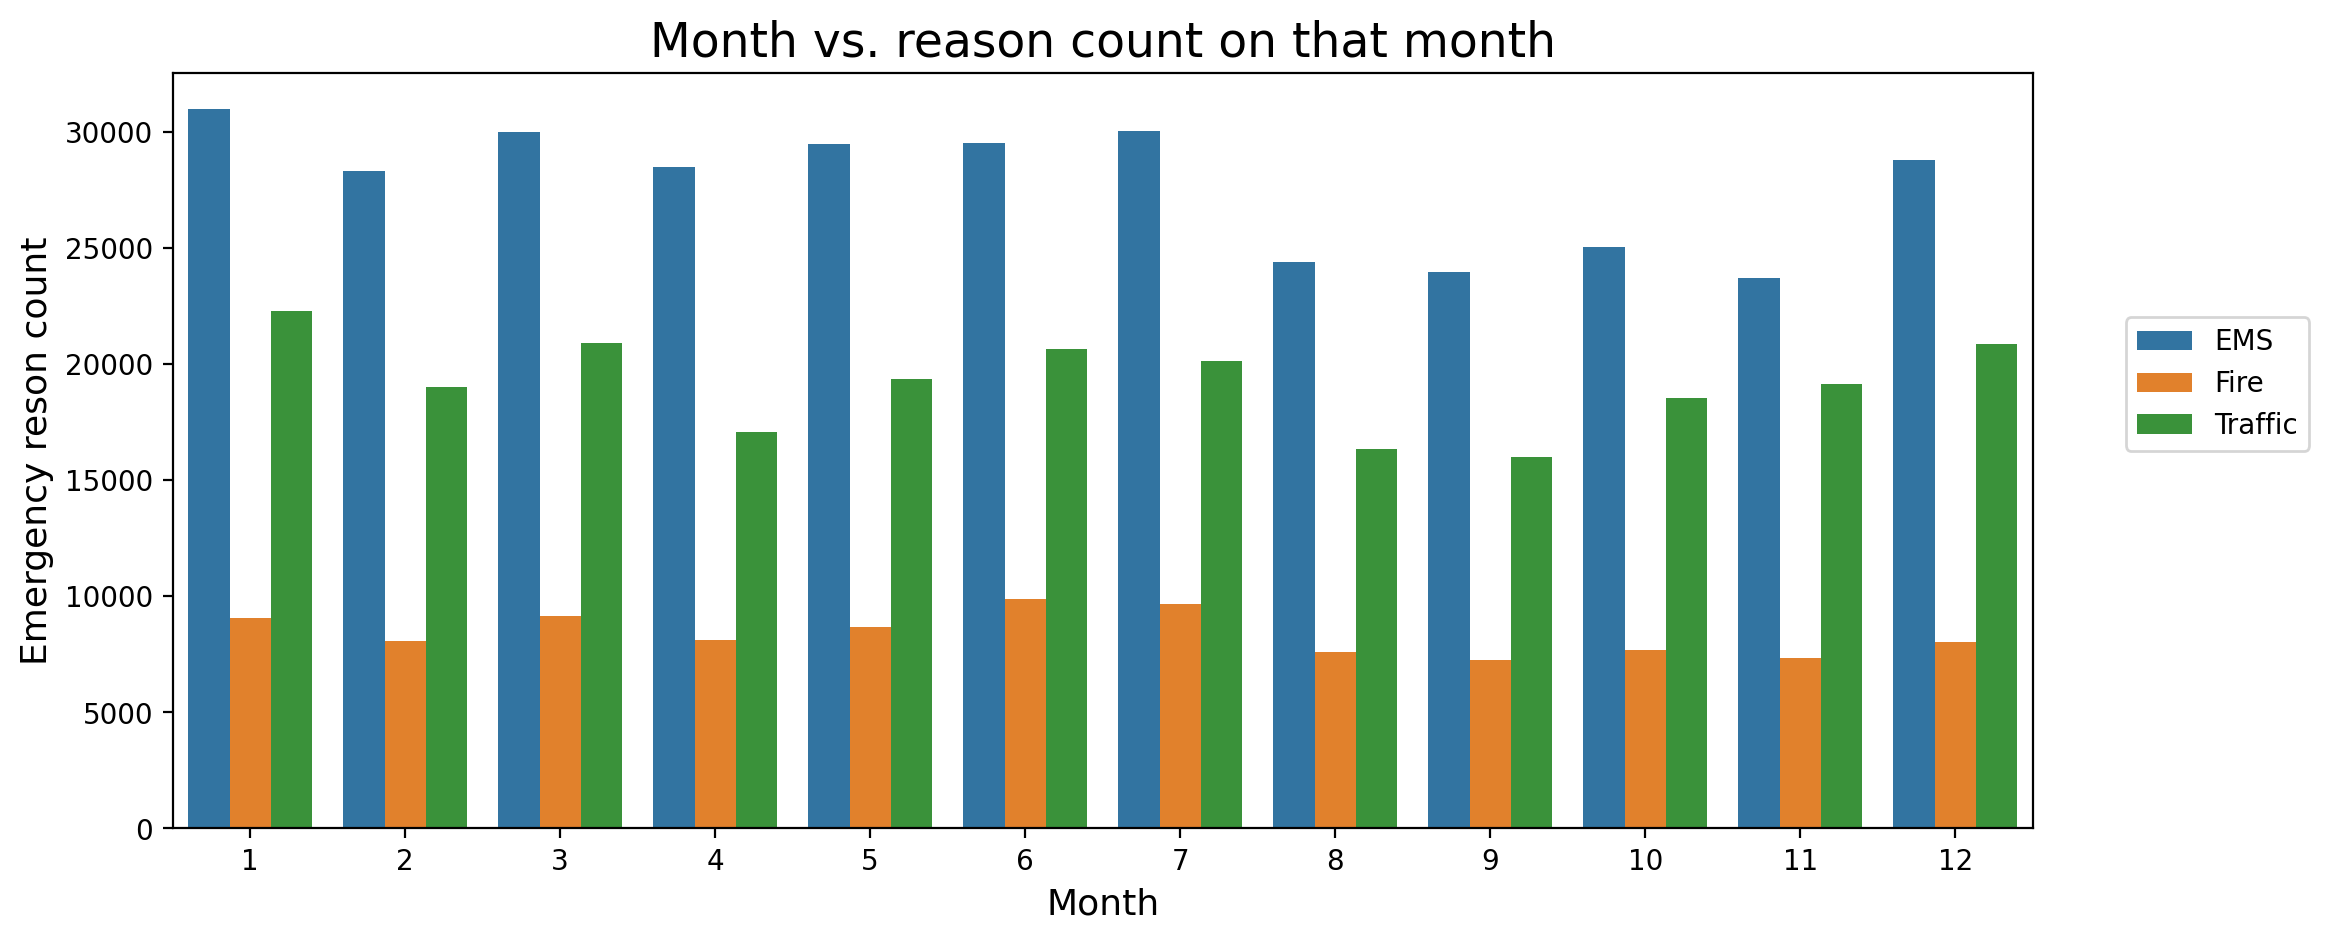

In [27]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='month',data=data,hue='reason')
plt.title('Month vs. reason count on that month',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Month',fontsize=13);

what are the emergency reason count in day and night?
For day hour = 7 - 19
For night hour = 00-6 and 18-00

In [28]:
def day_night(x):
    if x in range(7,20):
        return 'Day hour'
    elif x in range(0,7):
        return 'Night hour'
    else:
        return 'Night hour'

In [29]:
data['day_night']=data['hour'].apply(day_night)

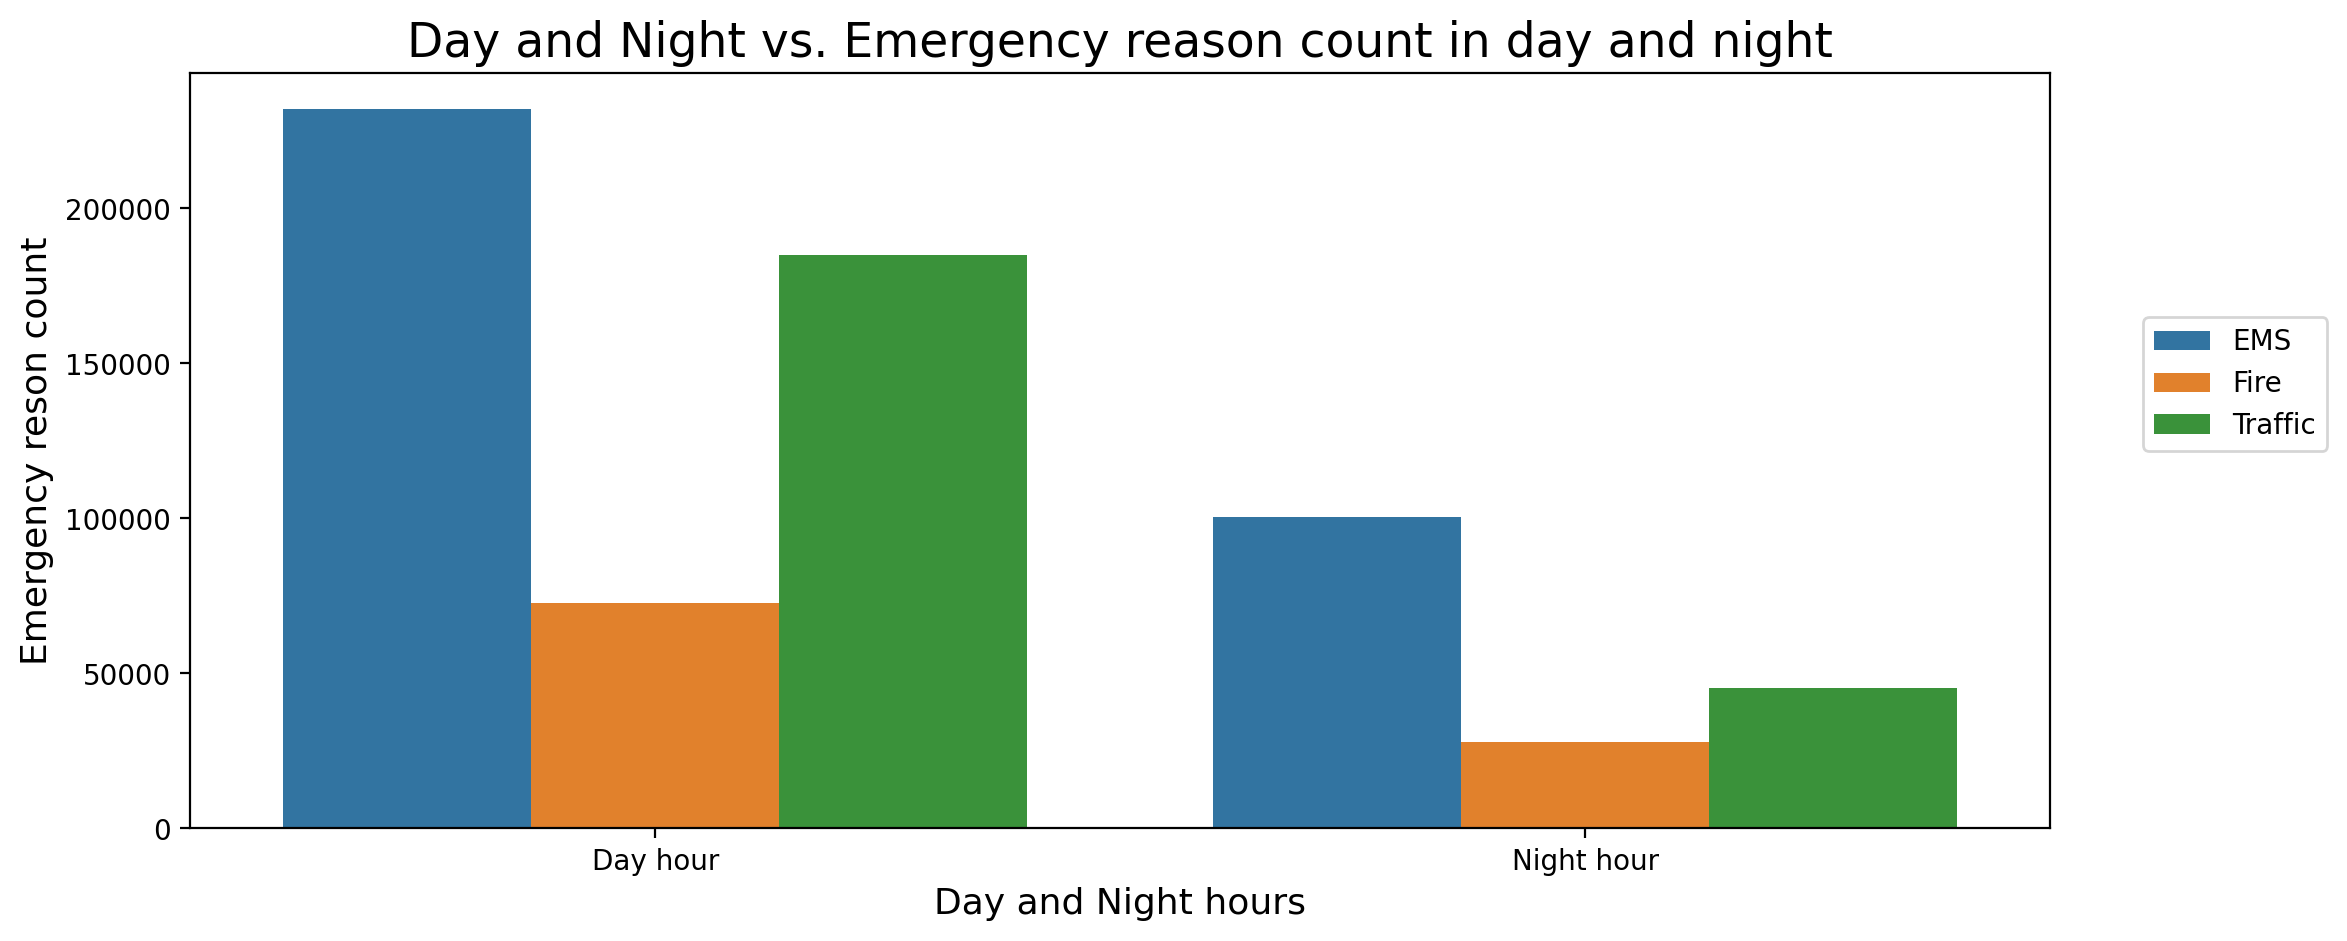

In [30]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='day_night',data=data,hue='reason')
plt.title('Day and Night vs. Emergency reason count in day and night',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Day and Night hours',fontsize=13);

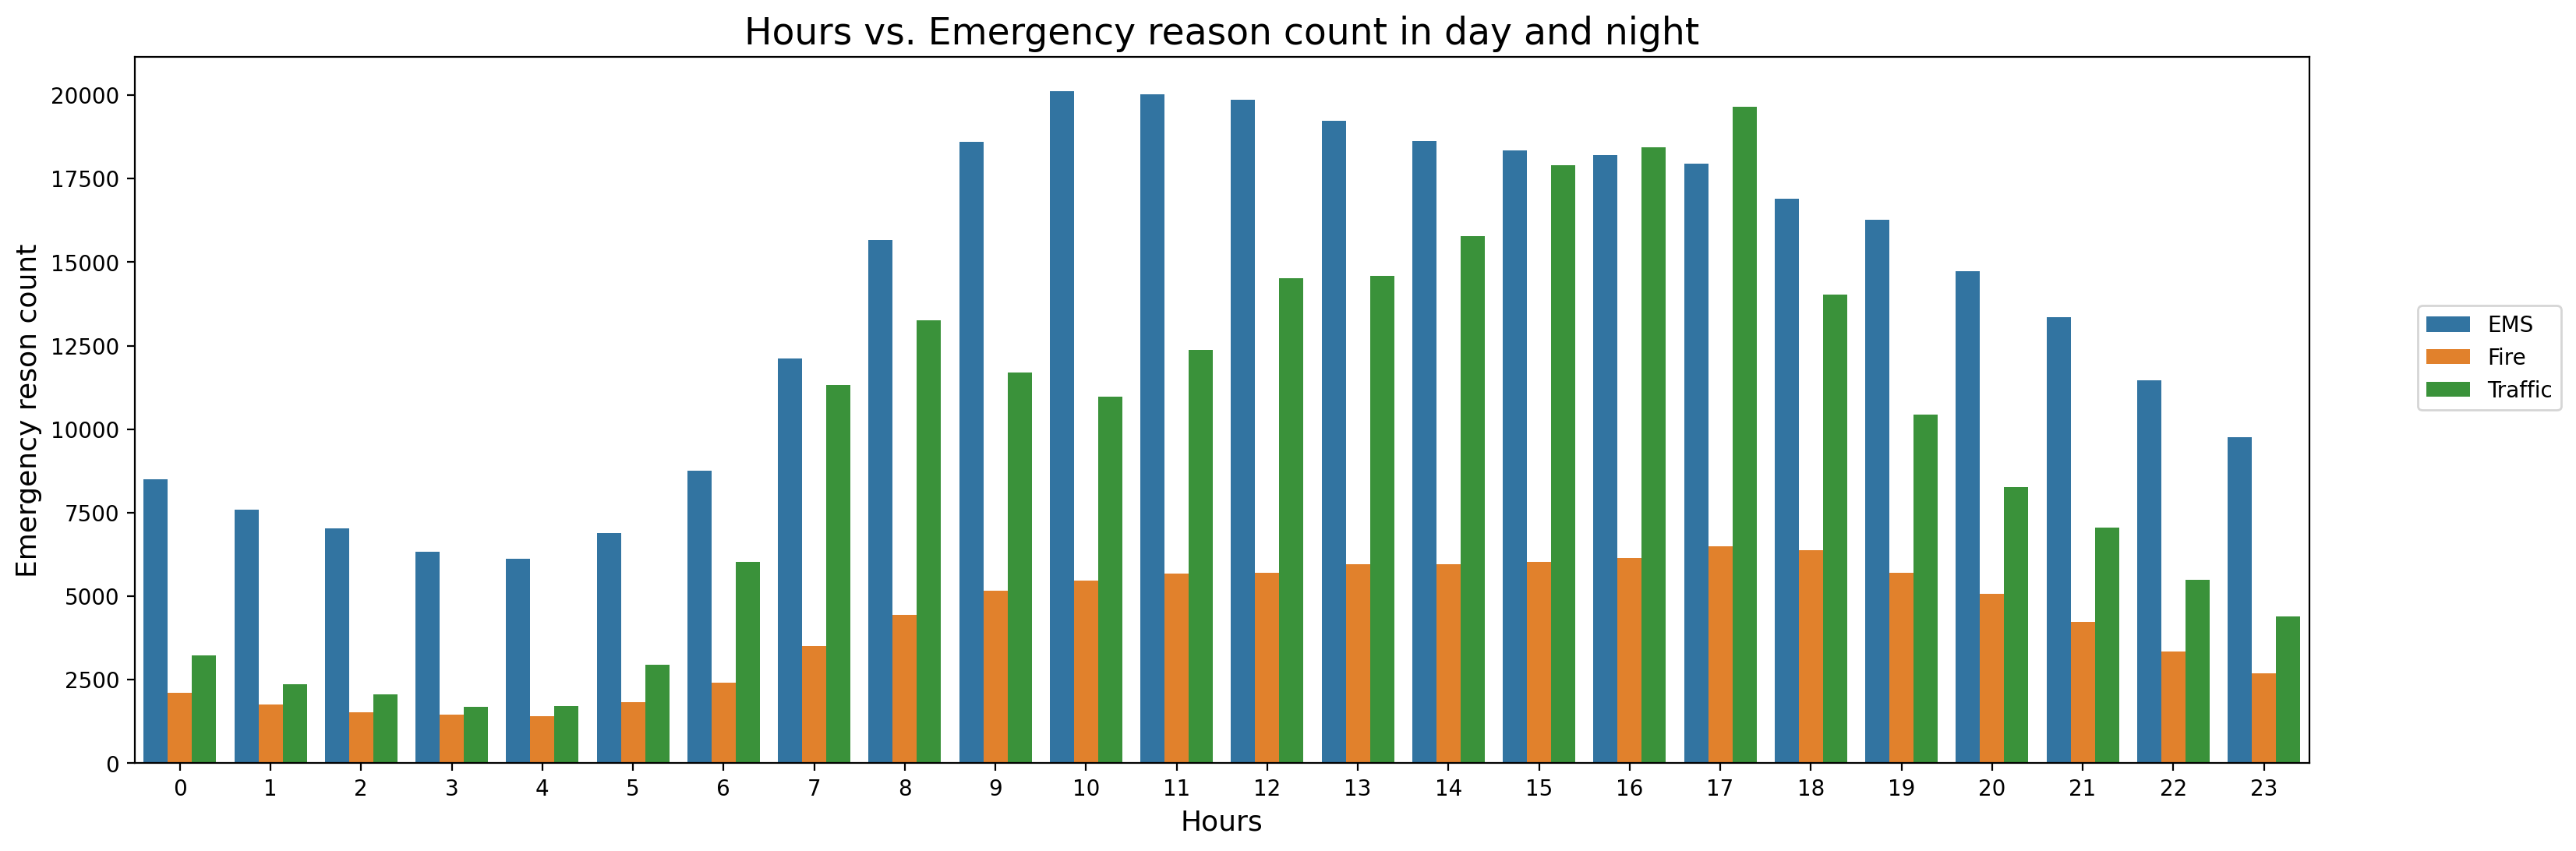

In [31]:
plt.figure(figsize=(18,6),dpi=200)
sns.countplot(x='hour',data=data,hue='reason')
plt.title('Hours vs. Emergency reason count in day and night',fontsize=17)
plt.legend(loc=(1.05,0.5))
plt.ylabel('Emergency reson count',fontsize=13)
plt.xlabel('Hours',fontsize=13);

Observations for Emergency reasons and their respective sub reasons with township

##### Township with most Fire emergency

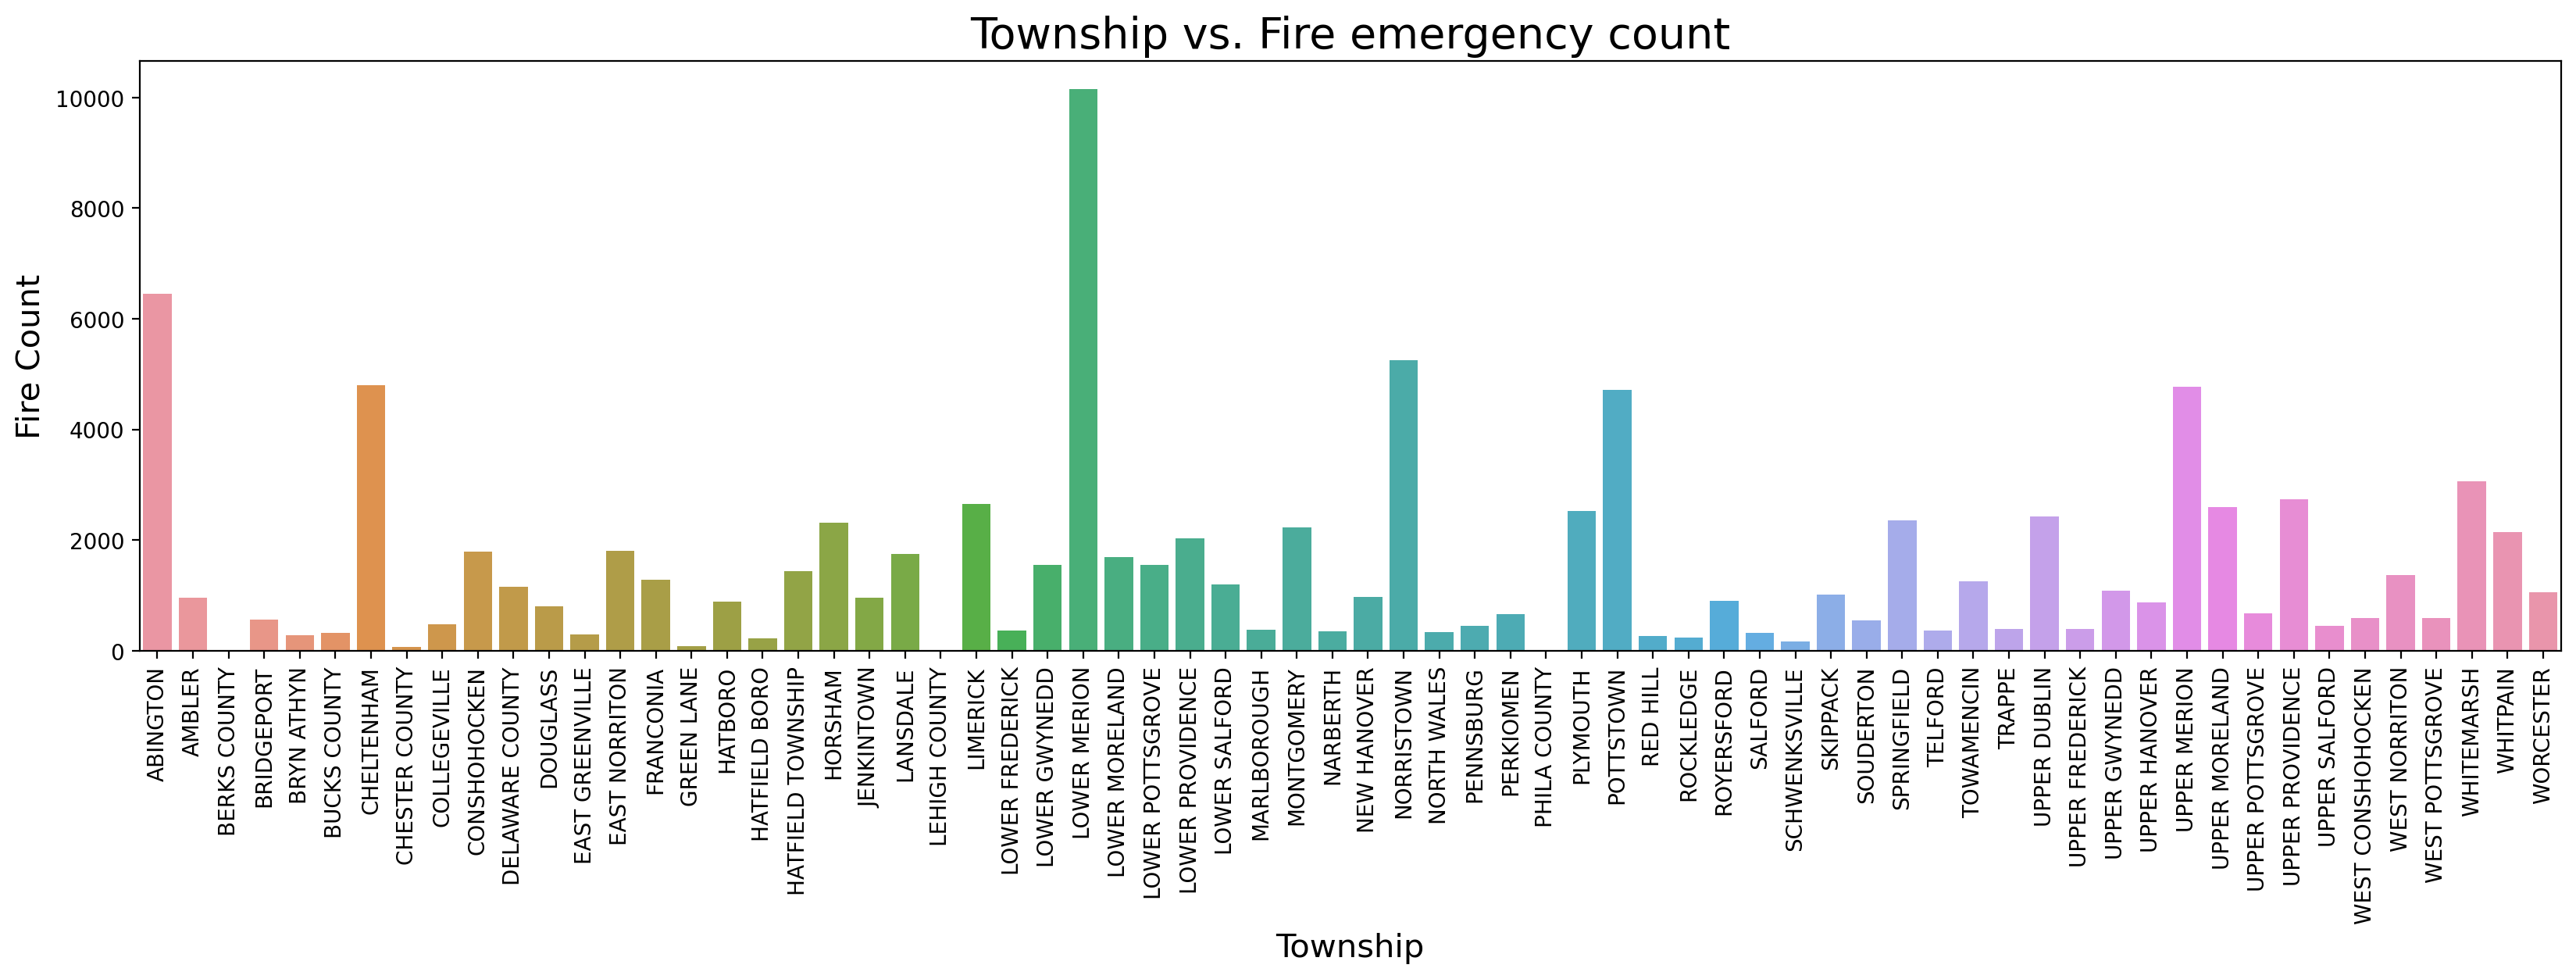

In [32]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[data['reason']=='Fire'].sort_values(by='twp'))
plt.title('Township vs. Fire emergency count',fontsize=20)
plt.ylabel('Fire Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

##### Sub reasons due to which fire emergency occurs

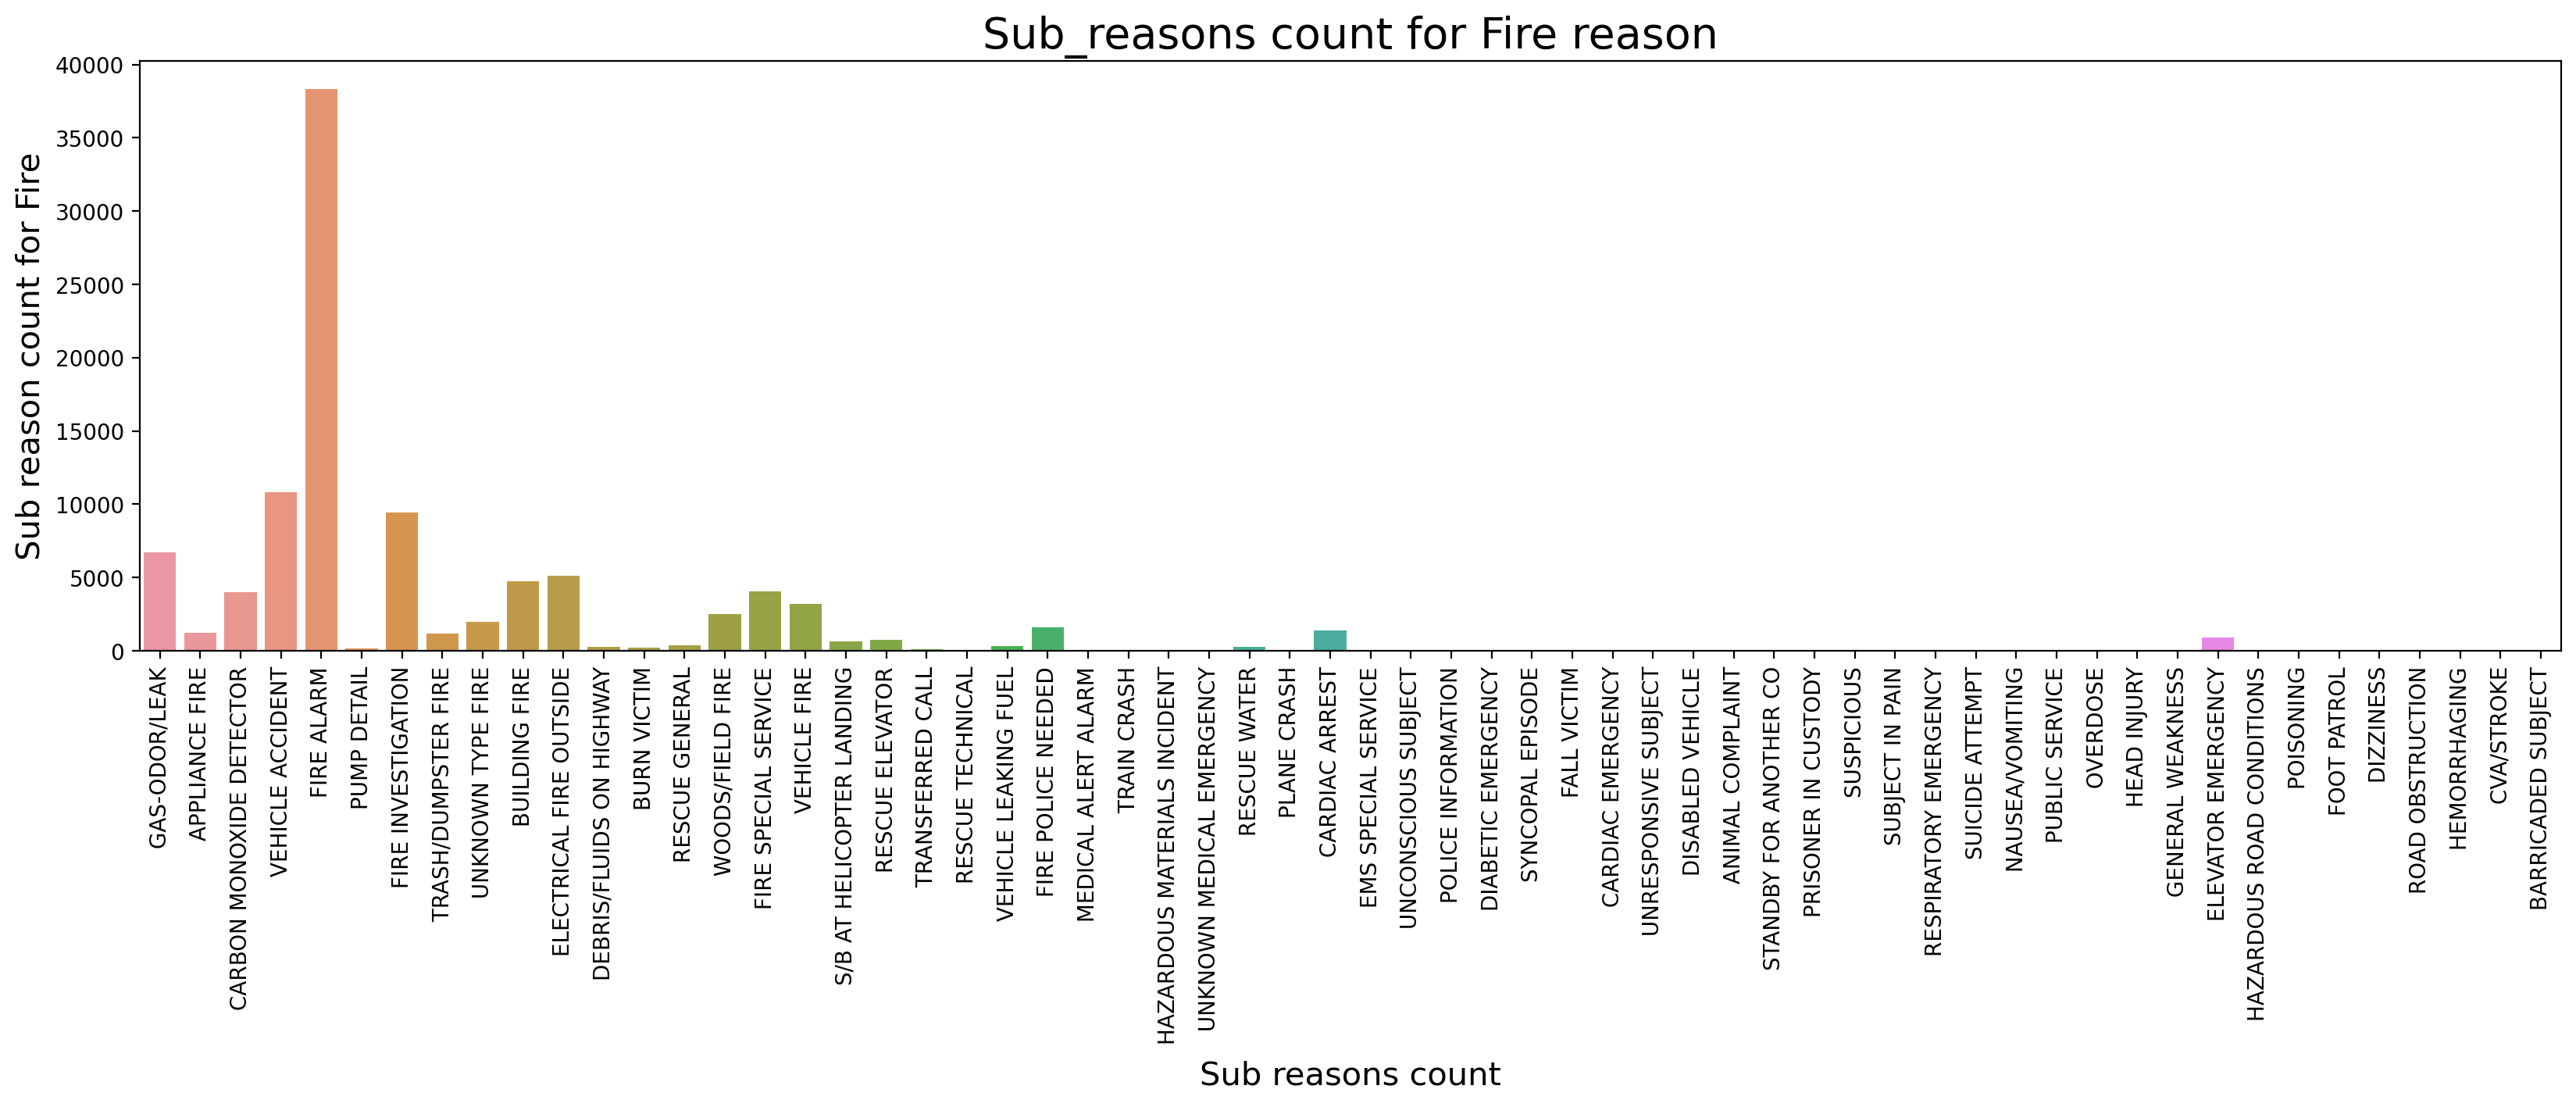

In [33]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='sub_reasons',data=data[data['reason']=='Fire'])
plt.title('Sub_reasons count for Fire reason',fontsize=20)
plt.ylabel('Sub reason count for Fire',fontsize=15)
plt.xlabel('Sub reasons count',fontsize=15)
plt.xticks(rotation=90);

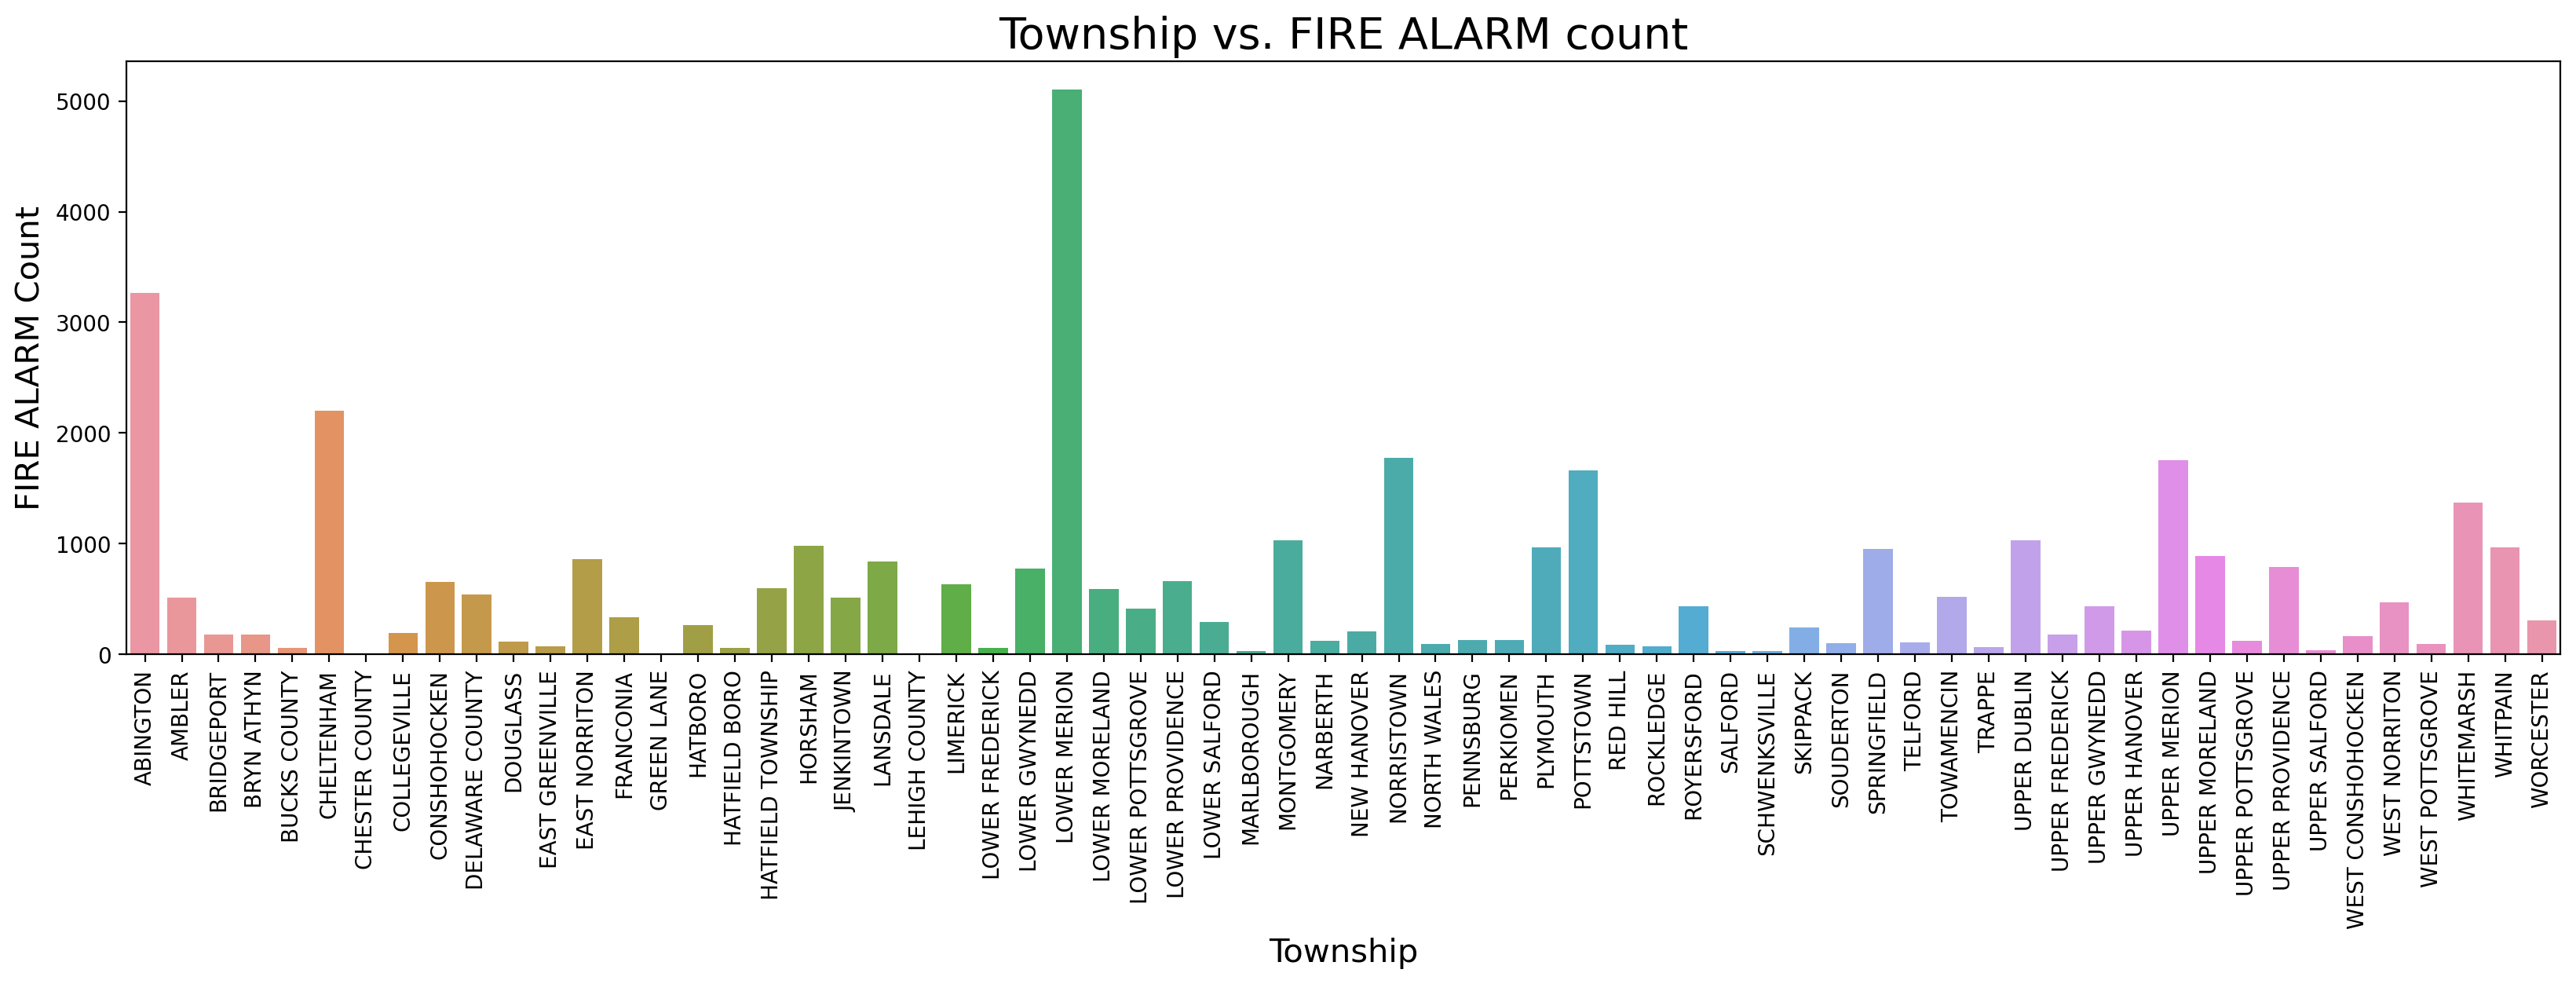

In [34]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[data['sub_reasons']==' FIRE ALARM'].sort_values(by='twp'))
plt.title('Township vs. FIRE ALARM count',fontsize=20)
plt.ylabel('FIRE ALARM Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

* Lower merion has most Fire emergencies
* Fire alarm is the sub reason due to which most of the fire emergency occurs
* Lower Merion and Abington are the township for the most fire alarm

##### Township with most EMS emergency

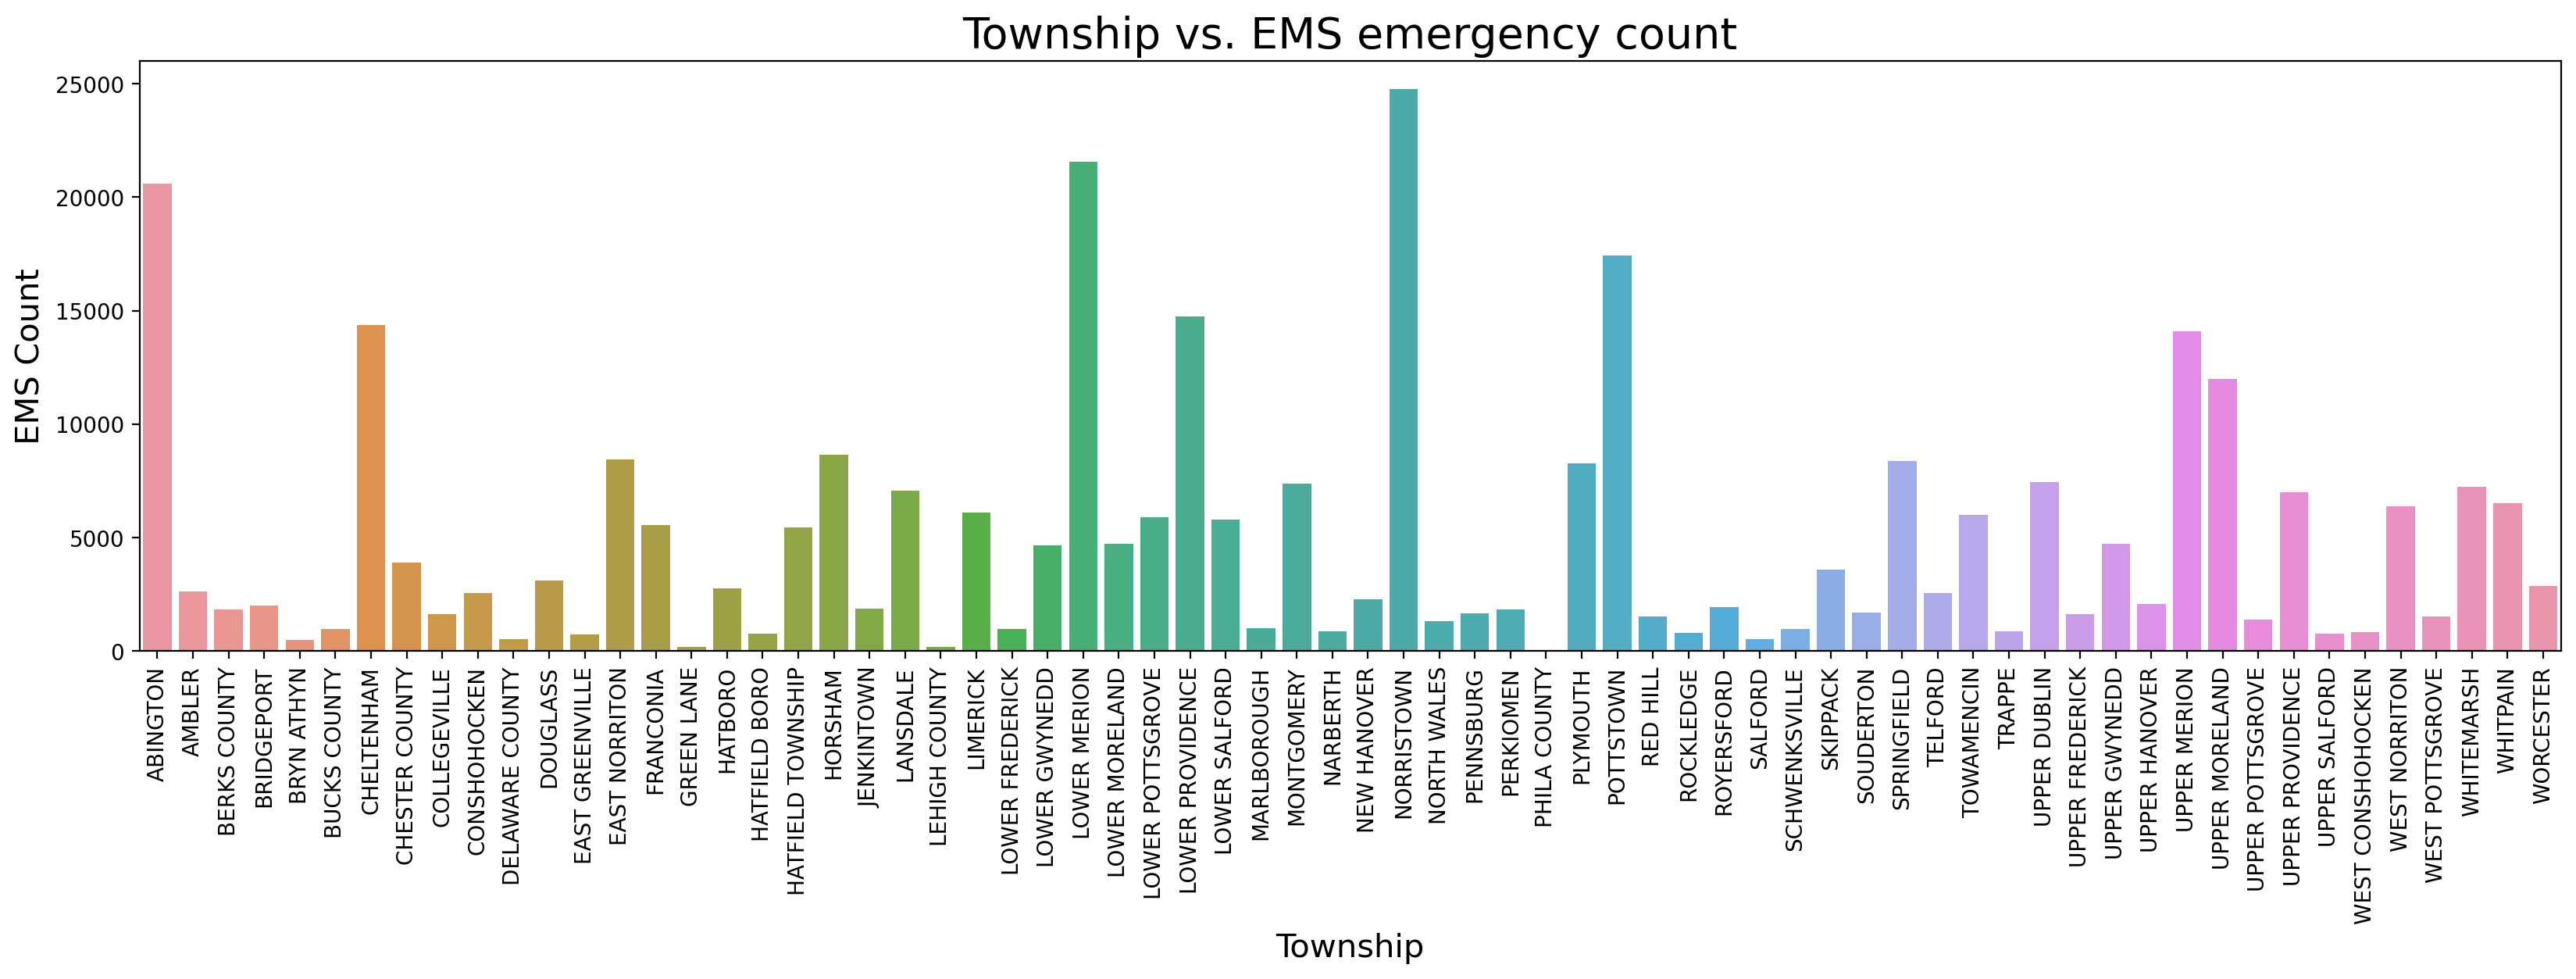

In [35]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[data['reason']=='EMS'].sort_values(by='twp'))
plt.title('Township vs. EMS emergency count',fontsize=20)
plt.ylabel('EMS Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

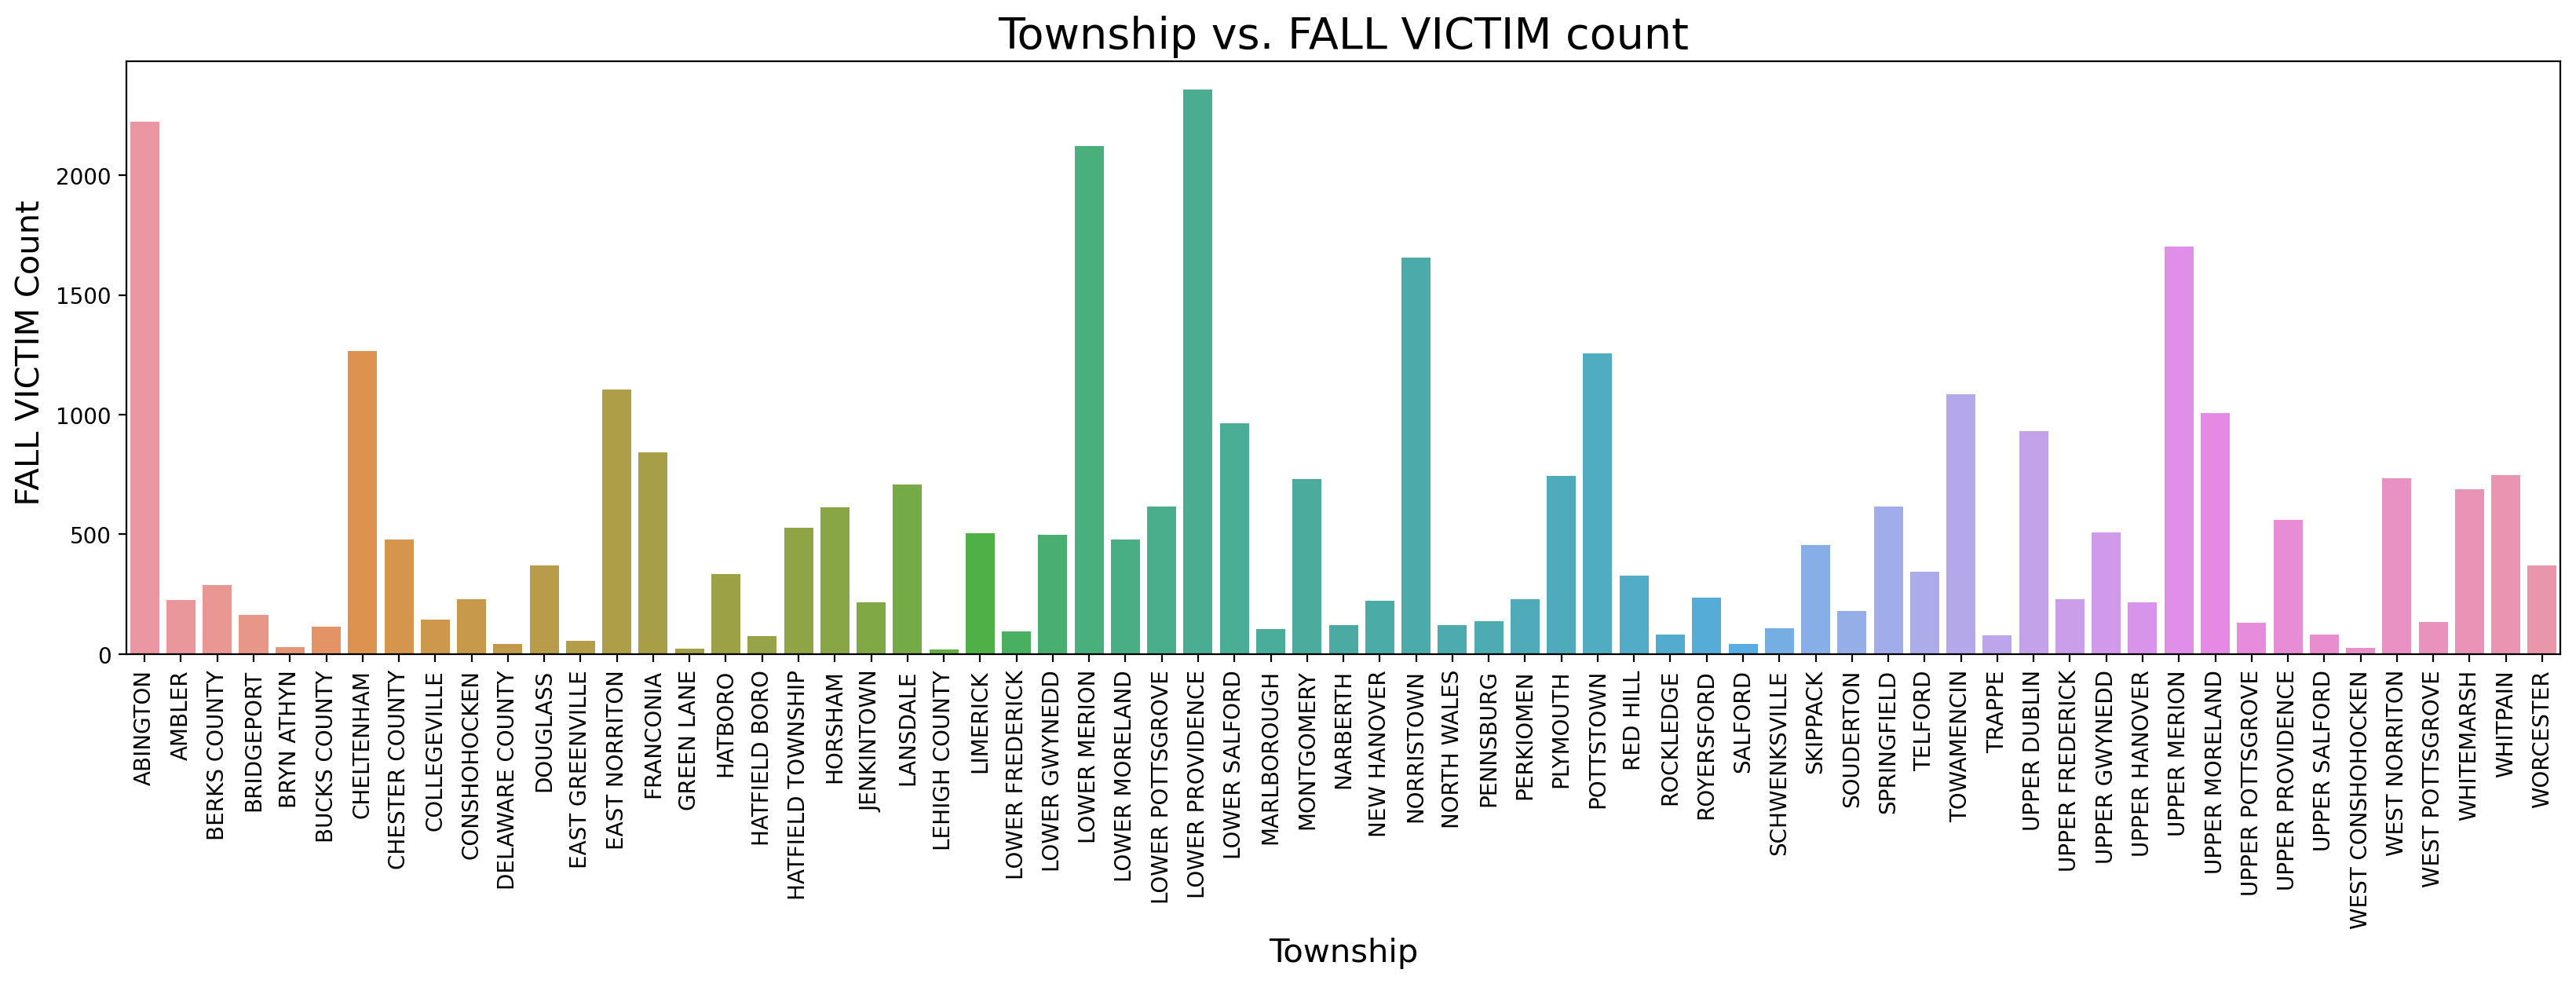

In [36]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[(data['sub_reasons']==' FALL VICTIM')].sort_values(by='twp'))
plt.title('Township vs. FALL VICTIM count',fontsize=20)
plt.ylabel(' FALL VICTIM Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

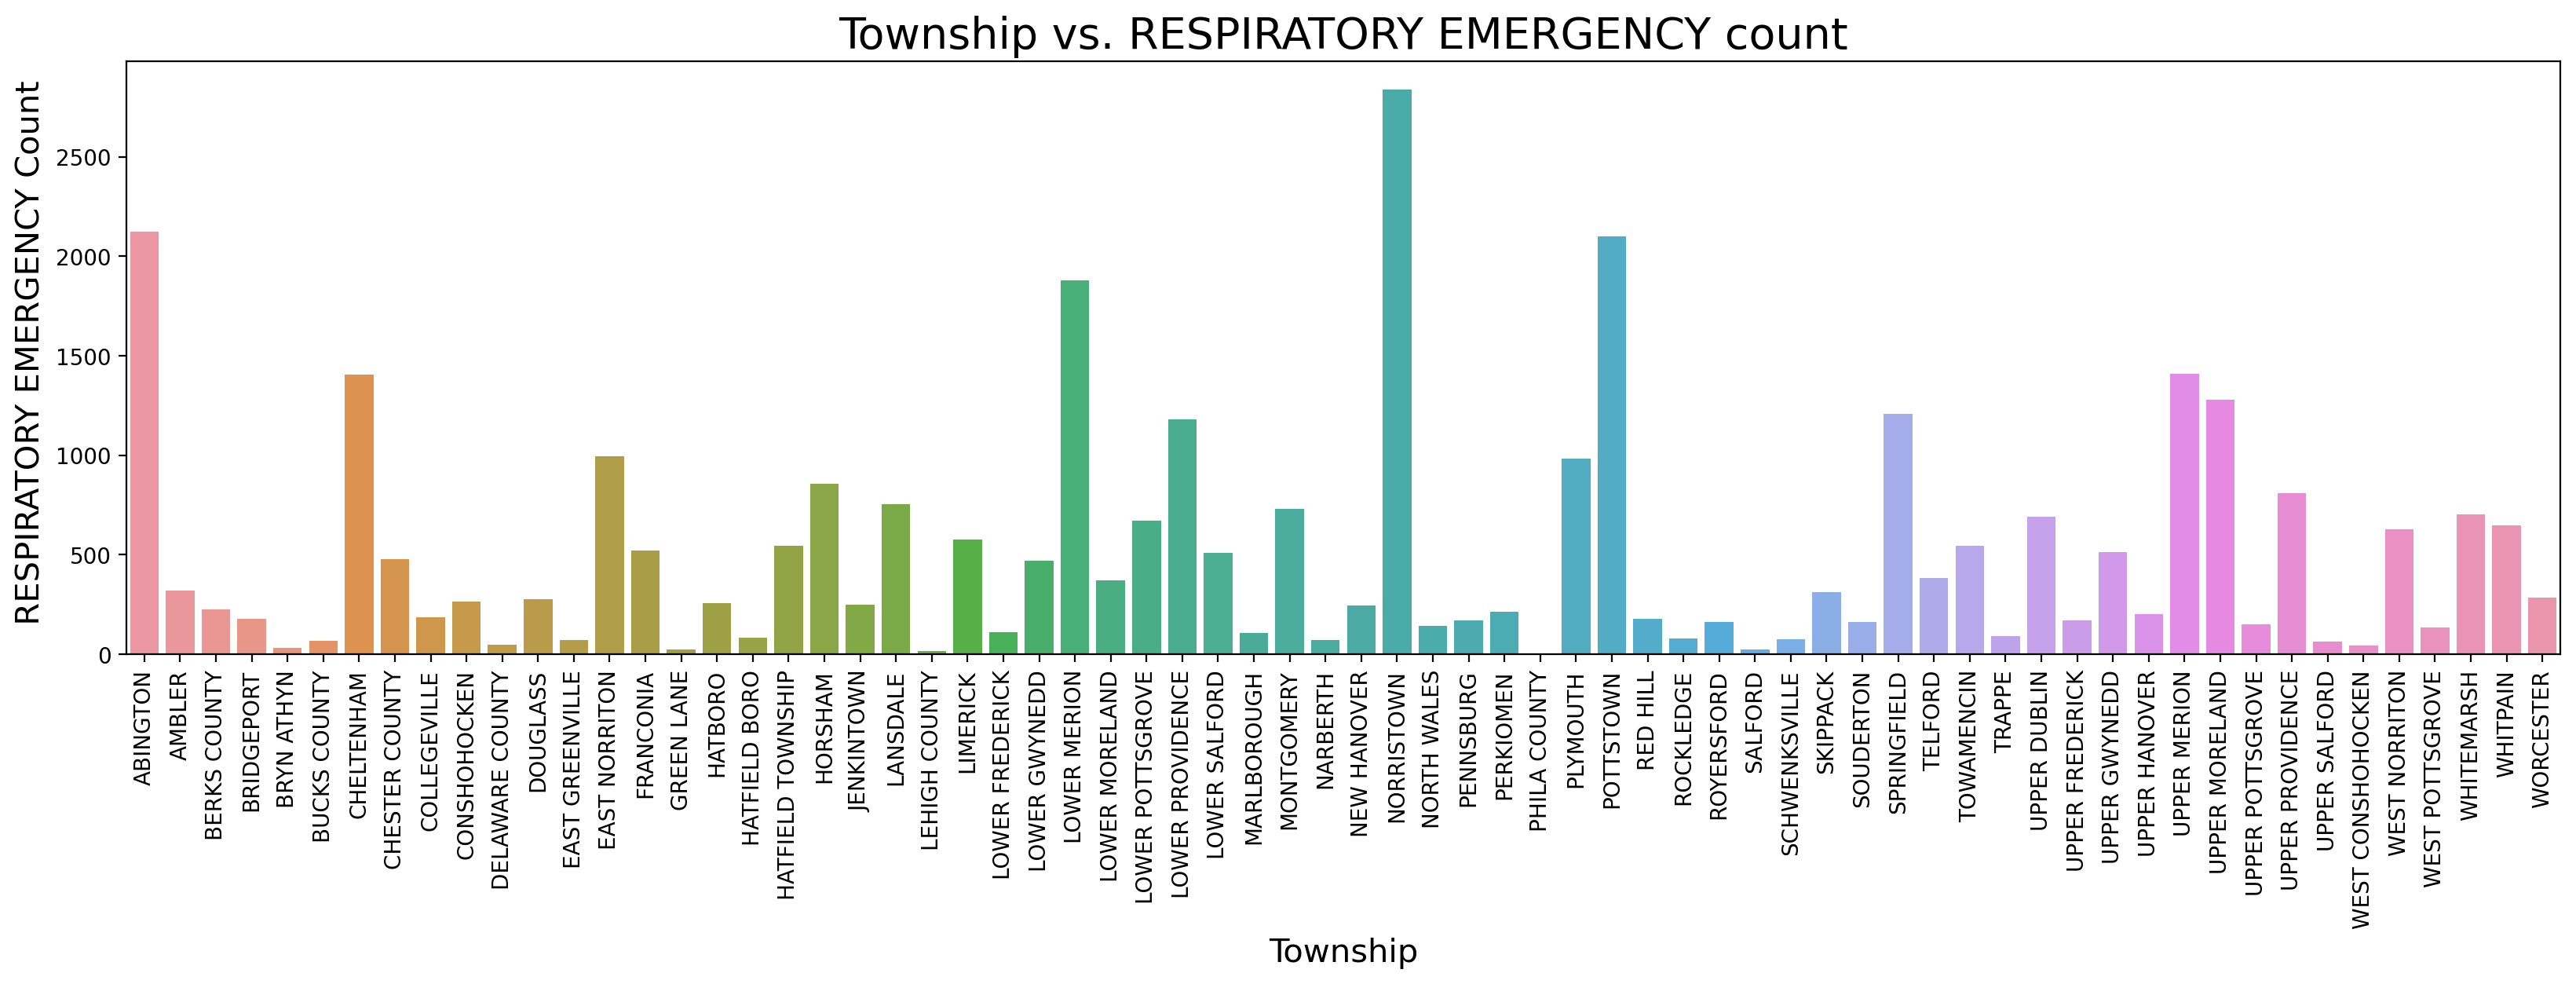

In [37]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[(data['sub_reasons']==' RESPIRATORY EMERGENCY')].sort_values(by='twp'))
plt.title('Township vs. RESPIRATORY EMERGENCY count',fontsize=20)
plt.ylabel(' RESPIRATORY EMERGENCY Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

* Norristown has most EMS emergencies
* Fall victim and Respiratory are the sub reason due to which most of the EMS emergency occurs
* Lower Providence,Abington and Lower Merion are the township for the most fall victims
* Norristown and Lower Merion are the township for the most Respiratory emergency implies that air pollution is higher than other cities

##### Township with most Traffic emergency

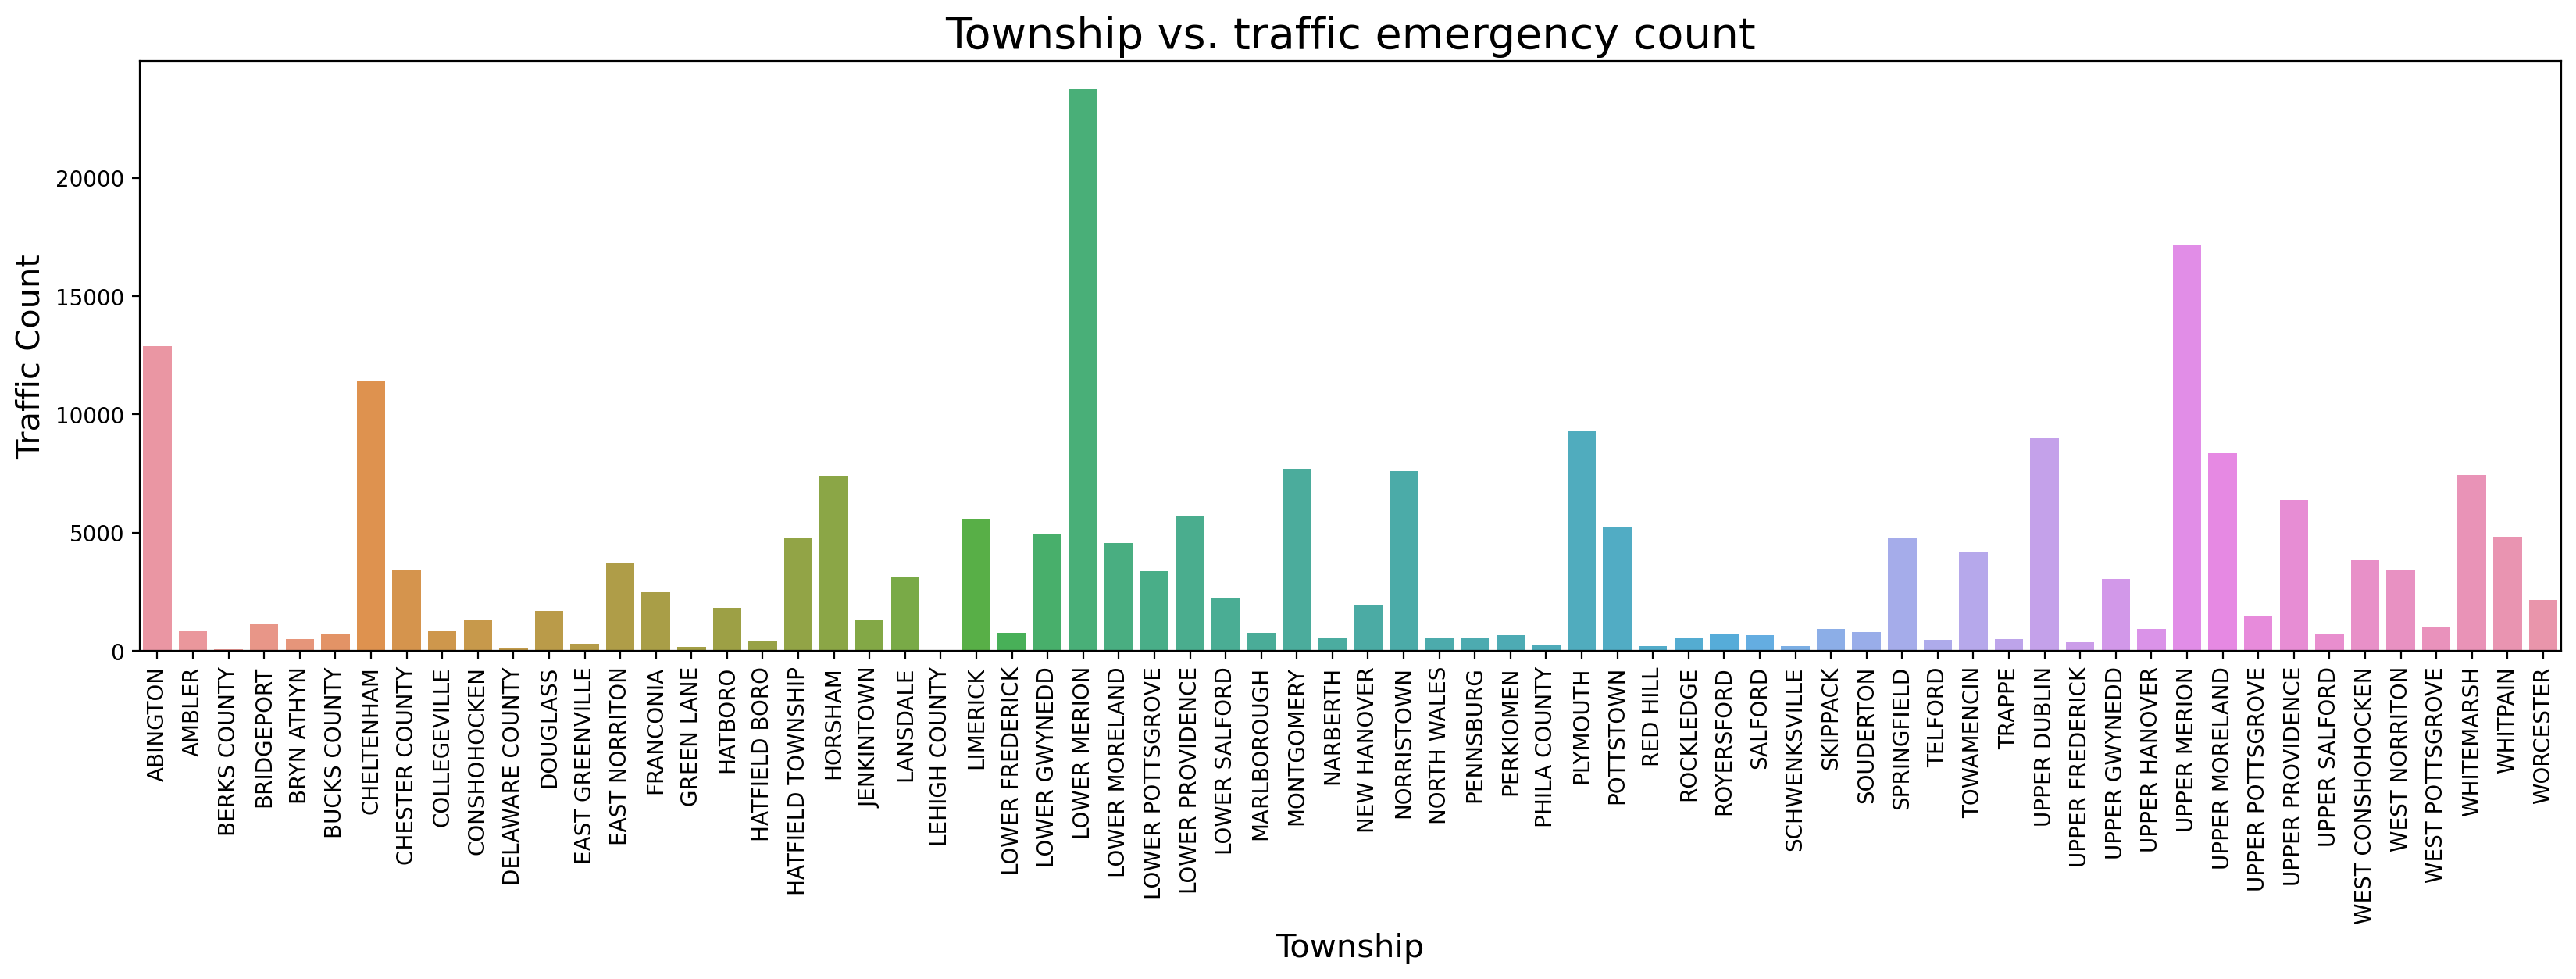

In [38]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[data['reason']=='Traffic'].sort_values(by='twp'))
plt.title('Township vs. traffic emergency count',fontsize=20)
plt.ylabel('Traffic Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

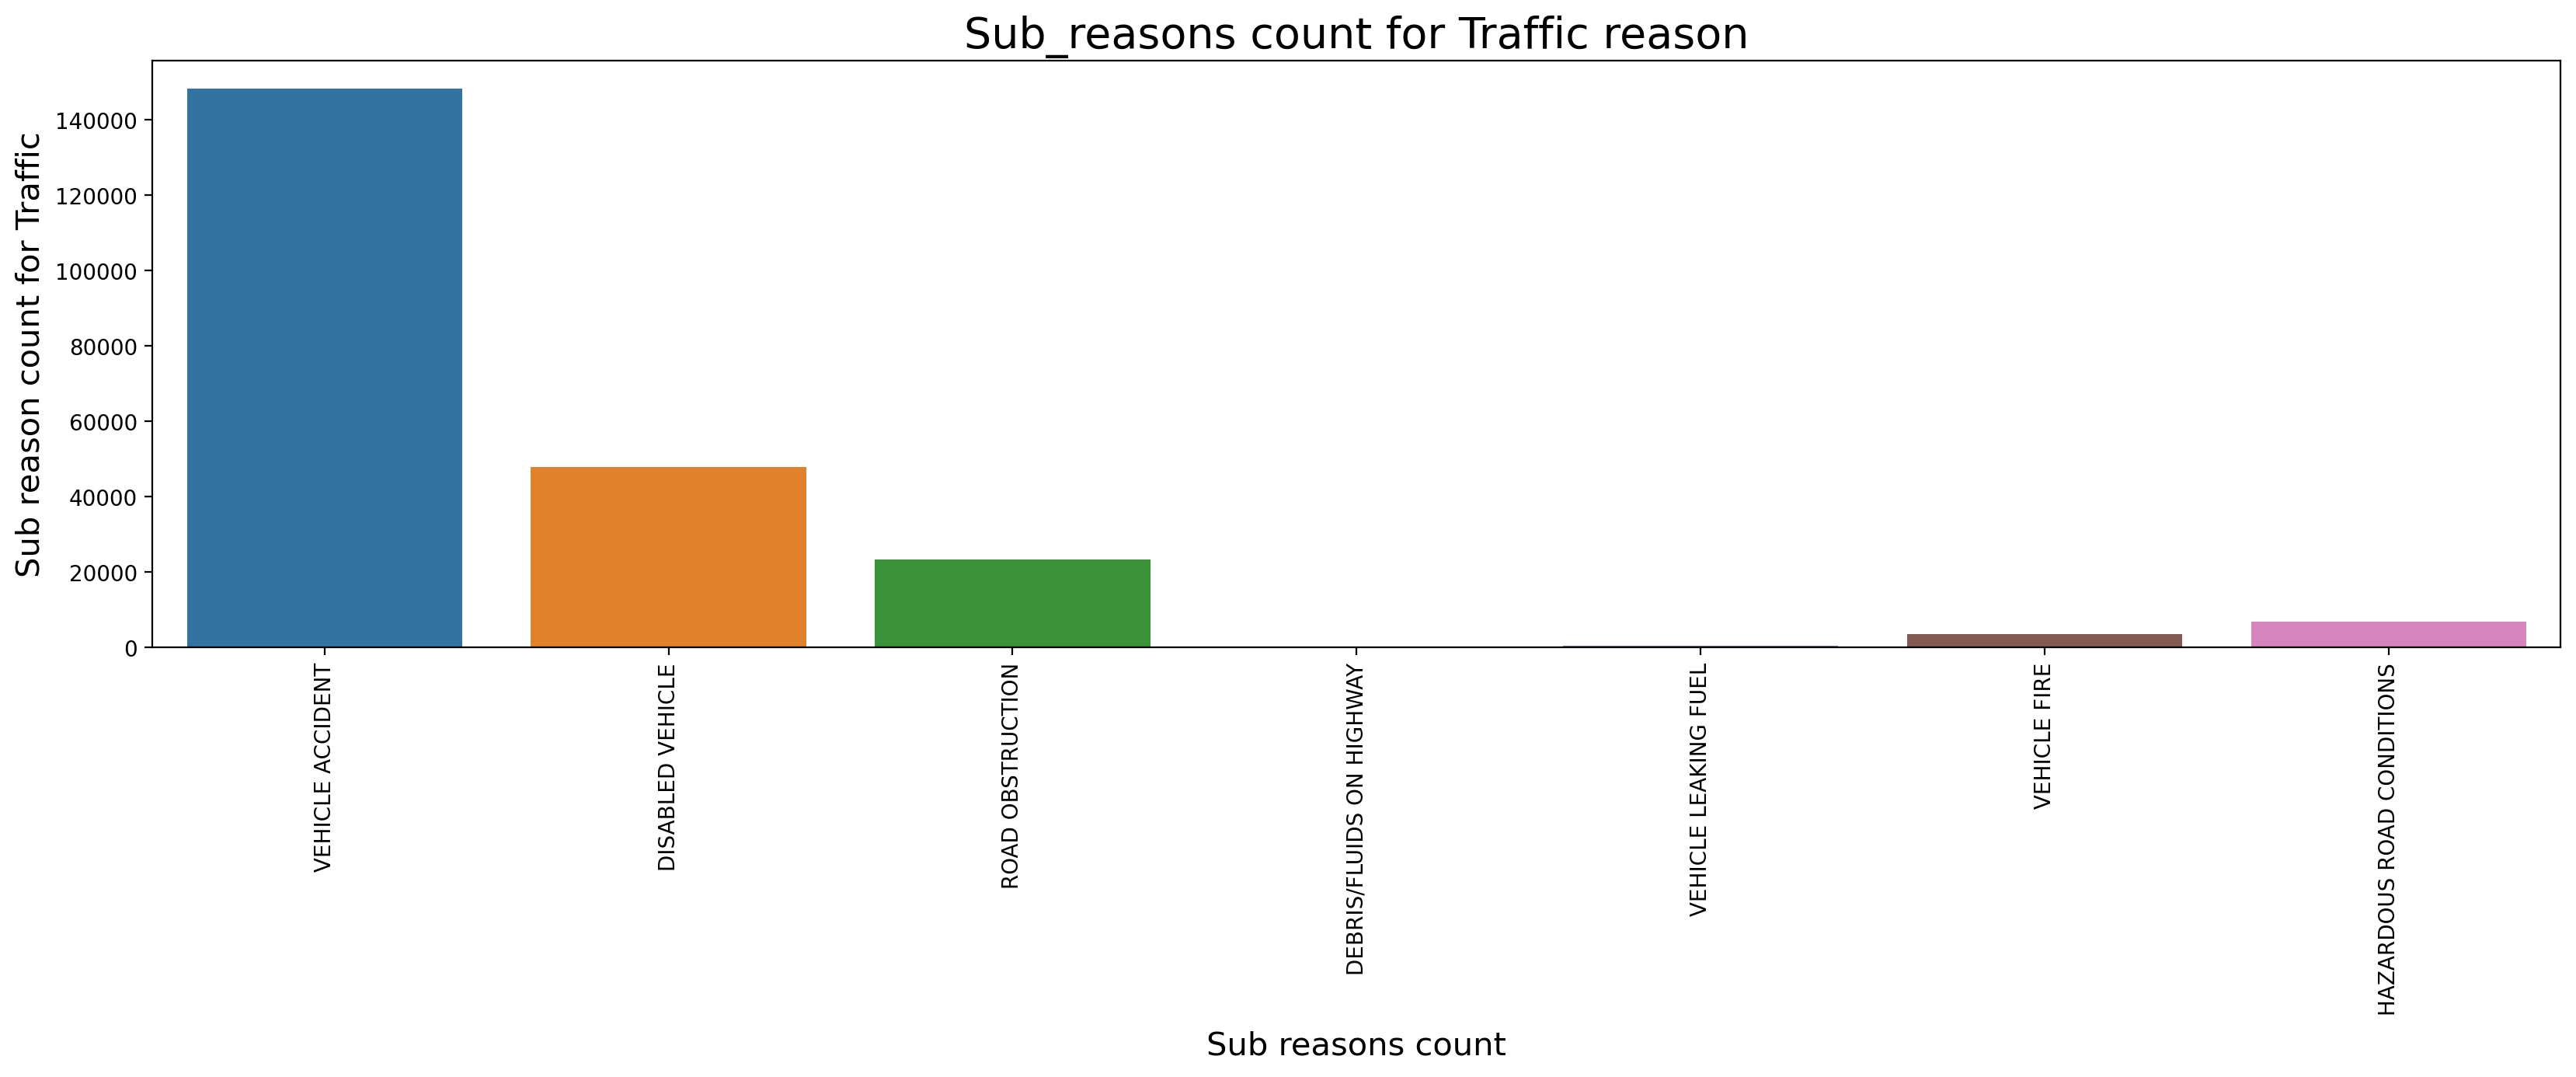

In [39]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='sub_reasons',data=data[data['reason']=='Traffic'])
plt.title('Sub_reasons count for Traffic reason',fontsize=20)
plt.ylabel('Sub reason count for Traffic',fontsize=15)
plt.xlabel('Sub reasons count',fontsize=15)
plt.xticks(rotation=90);

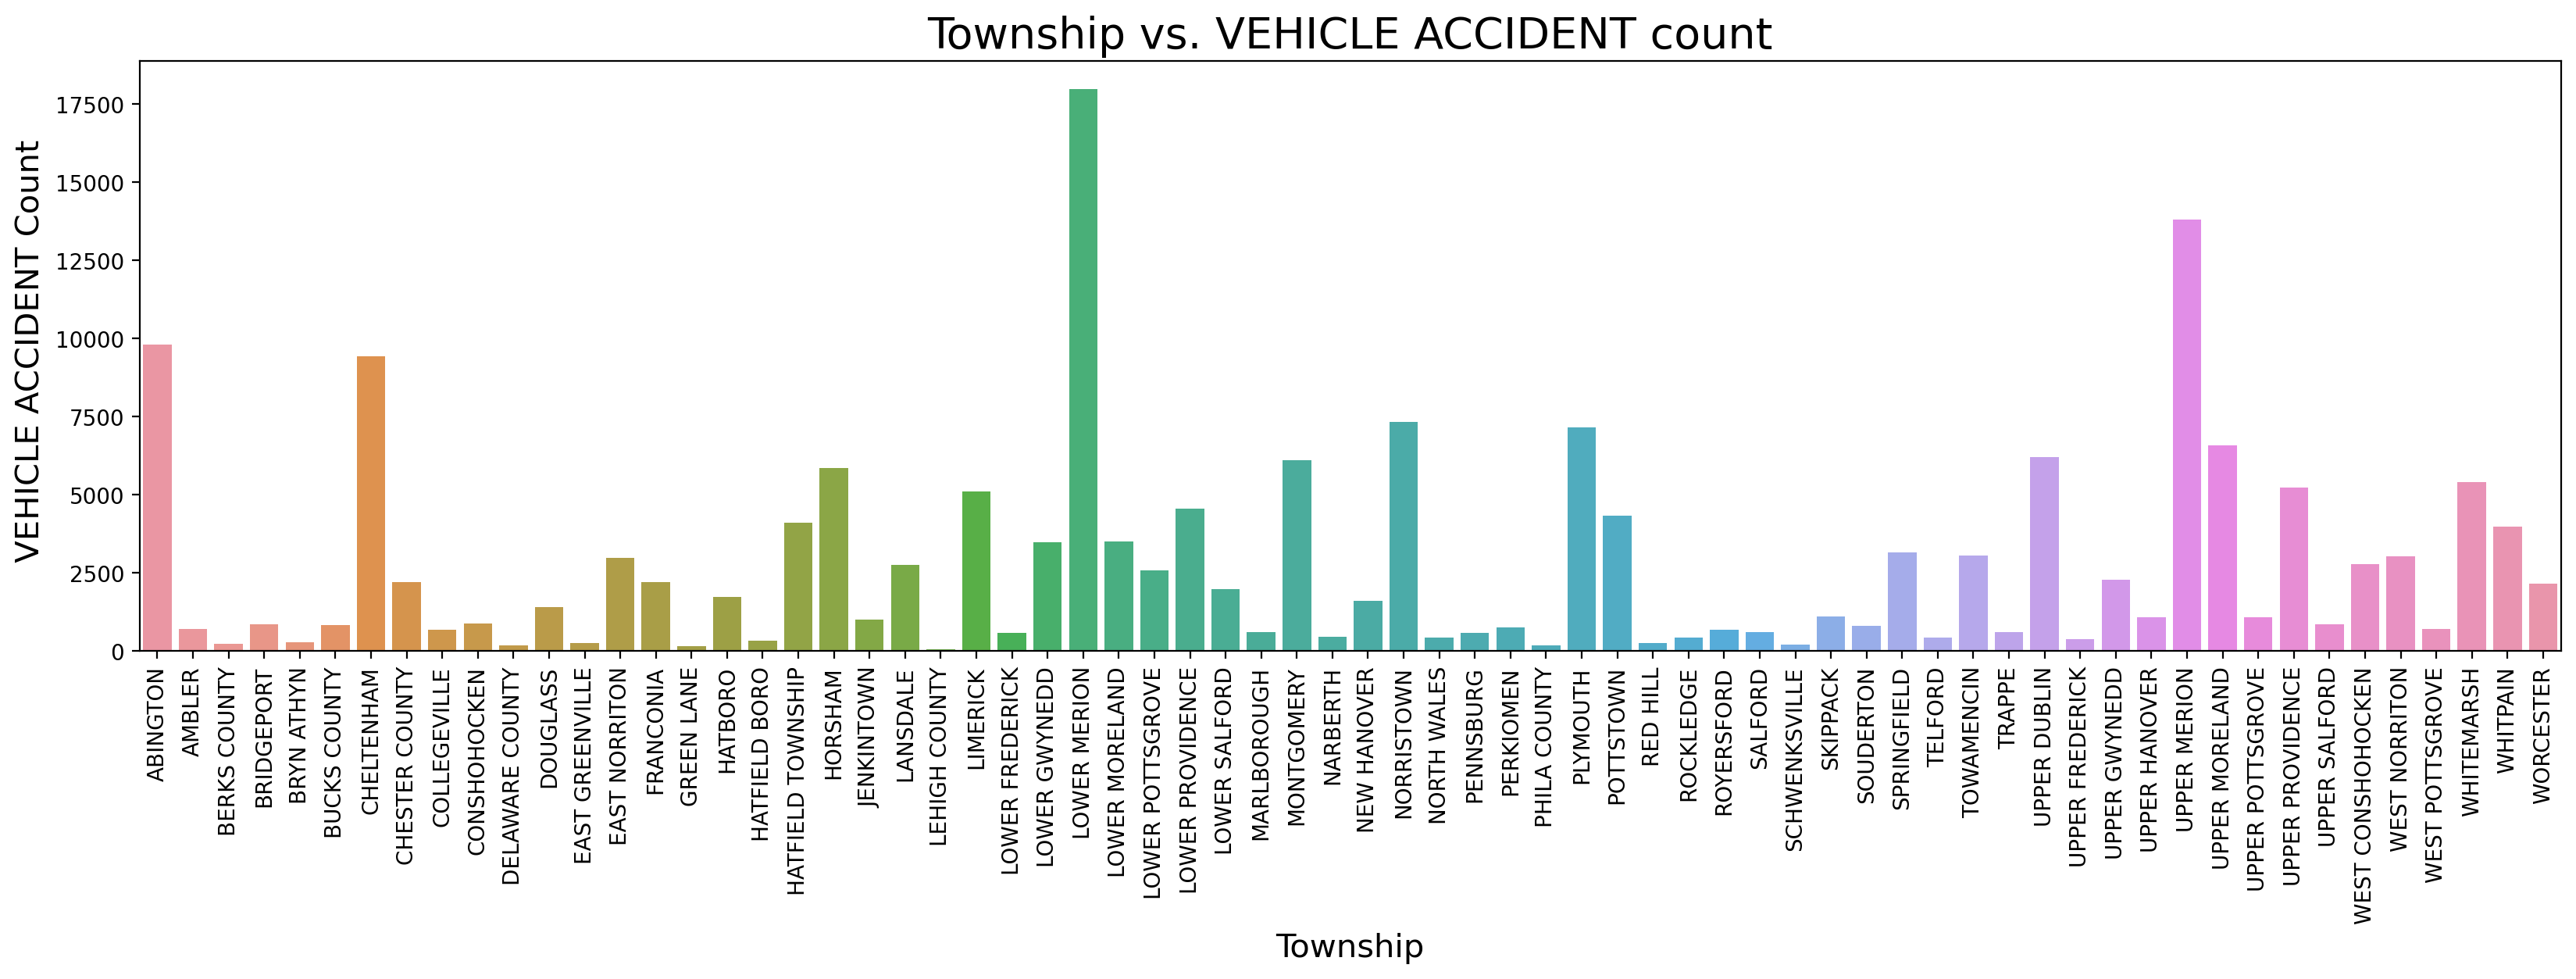

In [40]:
plt.figure(figsize=(20,5),dpi=200)
sns.countplot(x='twp',data=data[data['sub_reasons']==' VEHICLE ACCIDENT'].sort_values(by='twp'))
plt.title('Township vs. VEHICLE ACCIDENT count',fontsize=20)
plt.ylabel(' VEHICLE ACCIDENT Count',fontsize=15)
plt.xlabel('Township',fontsize=15)
plt.xticks(rotation=90);

* Lower Merion and Upper Merion has most Traffic emergencies
* Vehicle accidents is the sub reason due to which most of the Traffic emergency occurs
* Lower Merion are the township for the most Vehicle accidents occurs

##### Key Observation for the township

* Lower Merion and Abington has most emergencies occurs.
* These cities needs better medical service and traffic control systems
* One way is to encourage the people to use public transport this will decrease the no of vehicles on road and thus lower the traffic emergency also reduce the pollution.
* Provide the guidelines for the maintain good health and regular health chekups.

##### Create a new column called 'Date' that contains the date from the timeStamp column.

In [41]:
def date(x):
    return x.date()
data['date'] = data['timeStamp'].apply(date)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,sub_reasons,day,hour,month,day_of_week,day_night,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,10,17,12,Thu,Day hour,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,10,17,12,Thu,Day hour,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,10,14,12,Thu,Day hour,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,10,16,12,Thu,Day hour,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,10,16,12,Thu,Day hour,2015-12-10


##### 3 separate plots with each plot representing a Reason for the 911 calls grouping dates

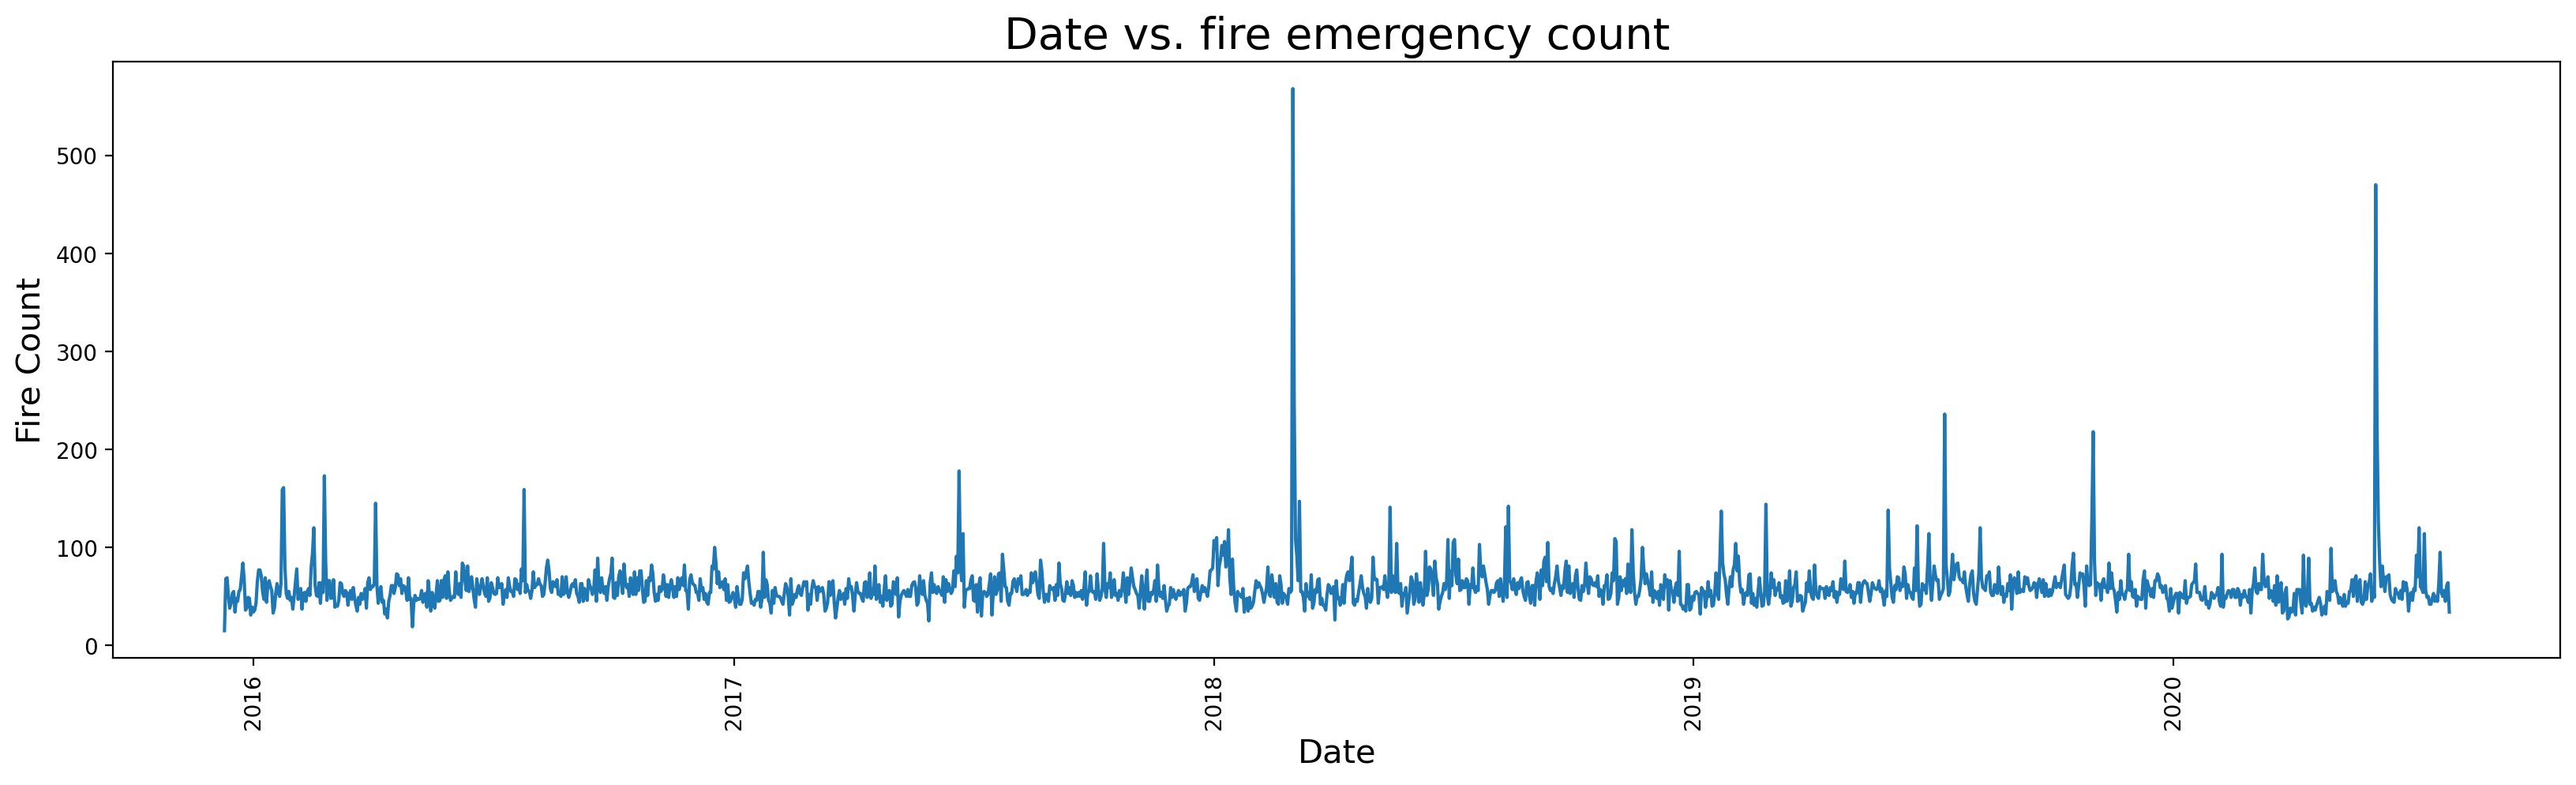

In [42]:
plt.figure(figsize=(20,5),dpi=200)
data[data['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Date vs. fire emergency count',fontsize=20)
plt.ylabel('Fire Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

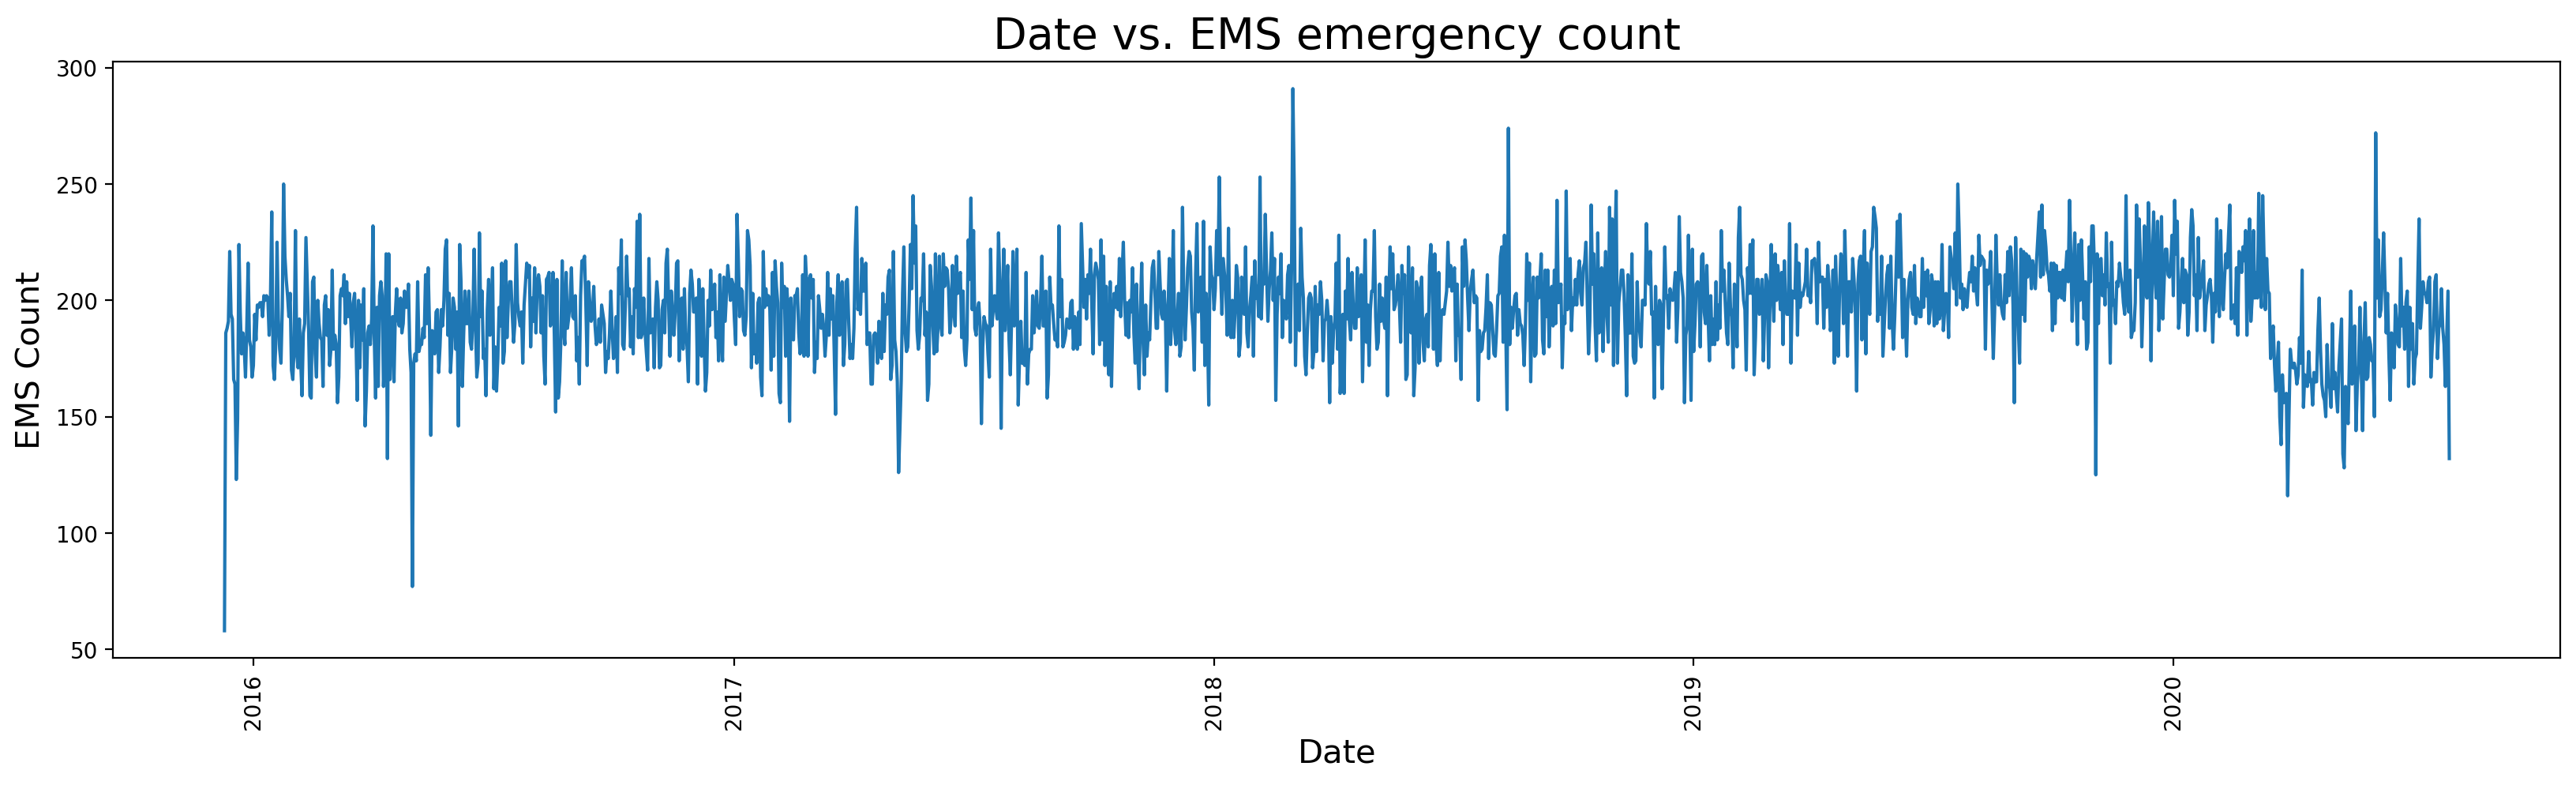

In [43]:
plt.figure(figsize=(20,5),dpi=200)
data[data['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('Date vs. EMS emergency count',fontsize=20)
plt.ylabel('EMS Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

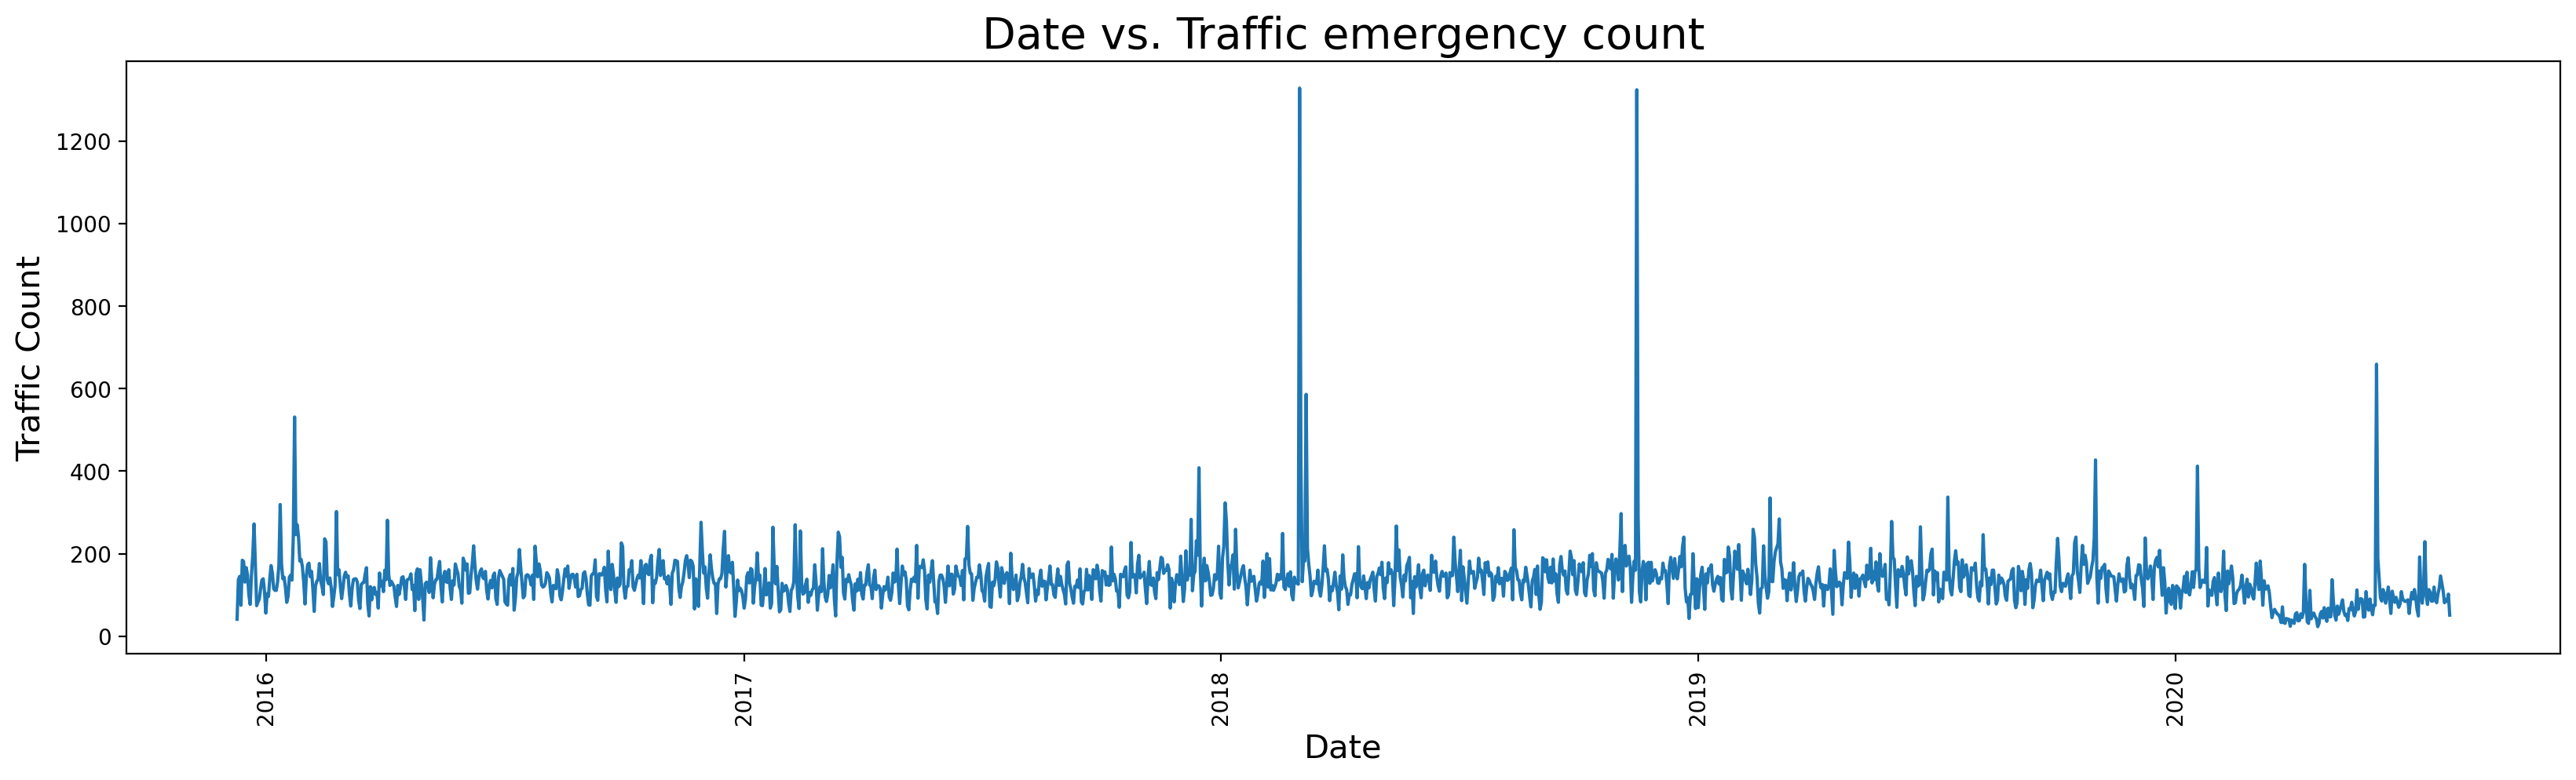

In [44]:
plt.figure(figsize=(20,5),dpi=200)
data[data['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Date vs. Traffic emergency count',fontsize=20)
plt.ylabel('Traffic Count',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.xticks(rotation=90);

* Fire and Traffic is peak between the 2018 to 2019
* EMS emergency is quiet same from 2016

##### Lets see the emergency count on specific day in specific time frame

In [45]:
data1 = data.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
data1

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Mon,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Sat,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sun,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thu,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351
Tue,1719,1455,1322,1212,1245,1741,2782,4425,5633,5562,...,5923,6251,6494,6877,5625,4618,3843,3408,2706,2133
Wed,1662,1481,1258,1262,1128,1609,2667,4643,5465,5443,...,6068,6532,6743,7061,5690,4684,4113,3530,2825,2204


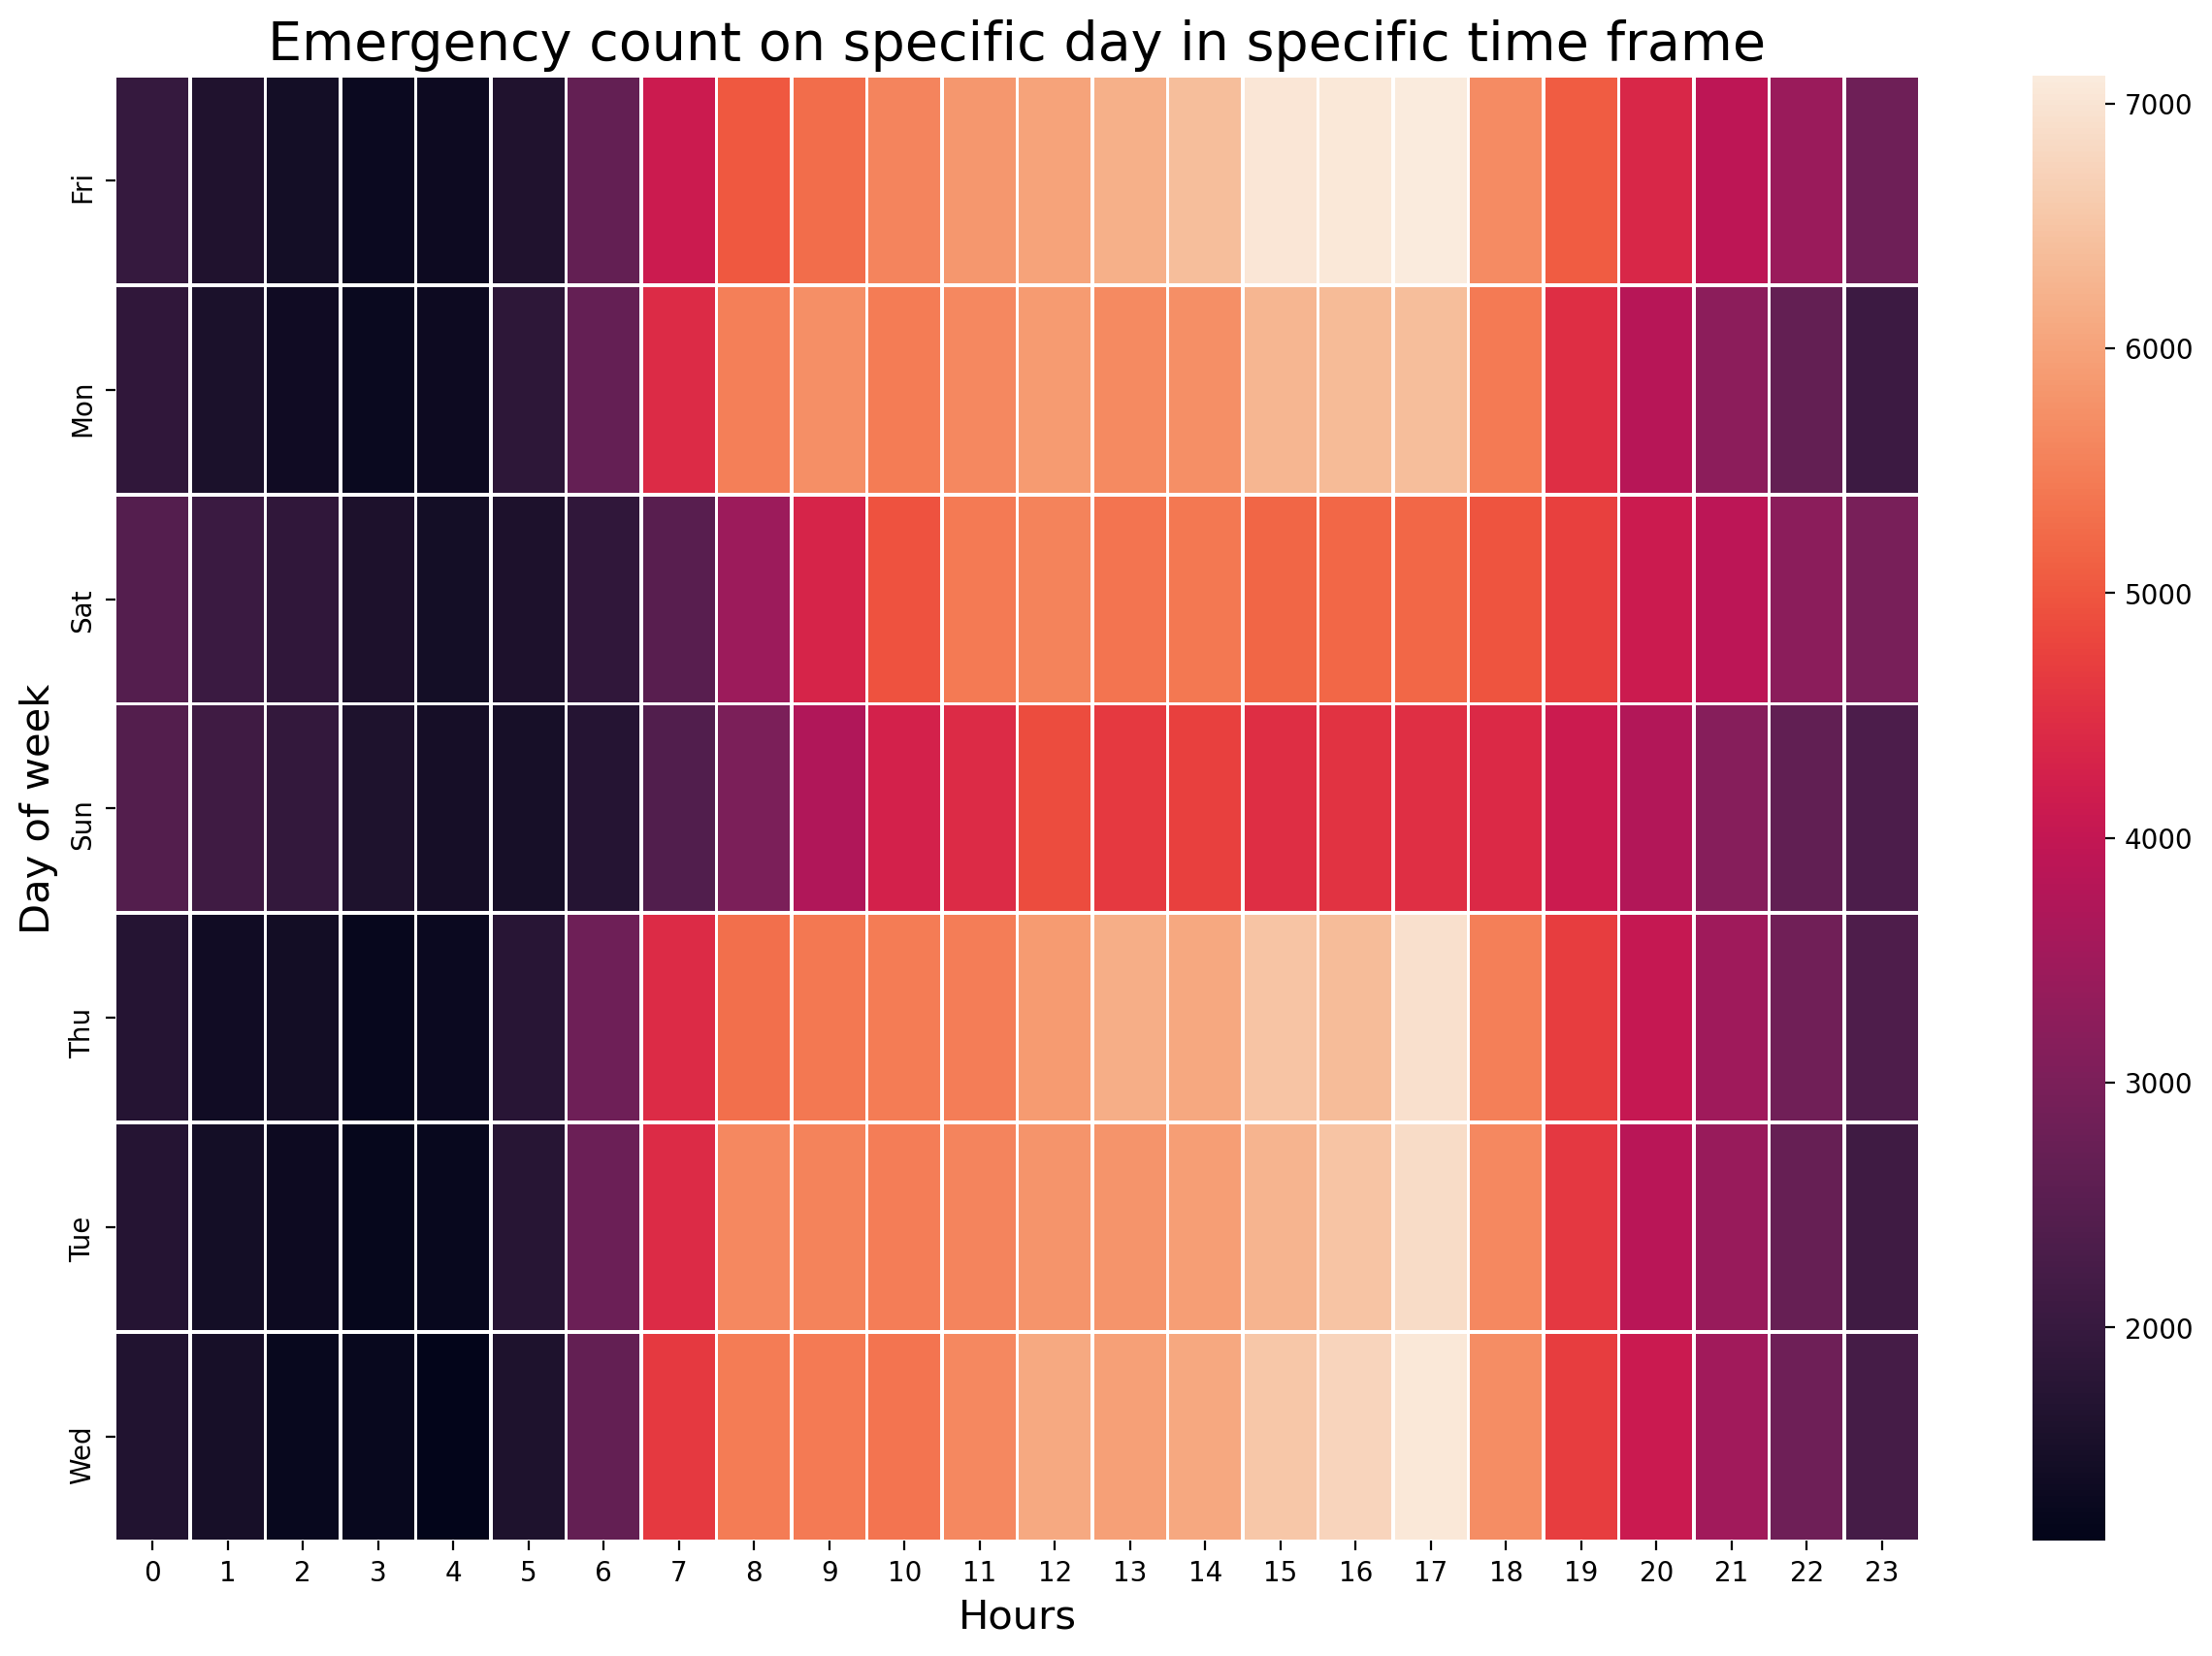

In [46]:
plt.figure(figsize=(15,10),dpi=200)
sns.heatmap(data1,linewidths=1)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Day of week',fontsize=15)
plt.title('Emergency count on specific day in specific time frame',fontsize=20);

### It is clearly seen that most of the emergency occurs during day hours for each day of the week except on weekend it is less than any other day